<a href="https://colab.research.google.com/github/JeswinJestin/video-frame-extractor/blob/main/Video_Frame.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# =========================
# 🚀 TabSet MVP - Colab Demo
# =========================

# 1. Install dependencies
!pip install yt-dlp scenedetect opencv-python-headless ffmpeg-python --quiet

import os
import cv2
import yt_dlp
from scenedetect import VideoManager, SceneManager
from scenedetect.detectors import ContentDetector
from google.colab import files

# 2. Ask user for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 3. Download video using yt-dlp
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo+bestaudio/best',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 4. Detect scenes using PySceneDetect
video_manager = VideoManager([video_path])
scene_manager = SceneManager()
scene_manager.add_detector(ContentDetector(threshold=30.0))

video_manager.set_downscale_factor()
video_manager.start()

scenes = scene_manager.detect_scenes(frame_source=video_manager)
scene_list = scene_manager.get_scene_list()

print(f"🔎 Detected {len(scene_list)} scenes.")

# 5. Extract first frame of each scene
frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
scene_frames = []

for i, (start, end) in enumerate(scene_list):
    frame_number = start.get_frames()
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if ret:
        frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
        cv2.imwrite(frame_path, frame)
        scene_frames.append(frame_path)

cap.release()

print("✅ Extracted keyframes from each scene.")

# 6. Show extracted frames
from IPython.display import Image, display
for f in scene_frames:
    display(Image(filename=f))

# 7. Option to download frames as ZIP
import shutil
shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
files.download("/content/scene_frames.zip")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.1/177.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.8/130.8 kB 7.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:294: SyntaxWarning: invalid escape sequence '\d'
  lines_video = [l for l in lines if ' Video: ' in l and re.search('\d+x\d+', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:367: SyntaxWarning: invalid escape sequence '\d'
  rotation_lines = [l for l in lines if 'rotate          :' in l and re.search('\d+$', l)]
/usr/local/lib/python3.12/dist-packages/moviepy/video/io/ffmpeg_reader.py:370: SyntaxWarning: invalid escape sequence '\d'
  match = re.search('\d+$', rotation_line)
/usr/local/lib/python3.12/dist-packages/moviepy/config_defaults.py:47: SyntaxWarning: invalid escape sequence '\P'
  IMAGEMAGICK_BINARY = r"C:\Program Files\ImageMagick-6.8.8-Q16\magick.exe"


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/64XHtNWTB5o
[youtube] Extracting URL: https://youtu.be/64XHtNWTB5o
[youtube] 64XHtNWTB5o: Downloading webpage
[youtube] 64XHtNWTB5o: Downloading tv simply player API JSON
[youtube] 64XHtNWTB5o: Downloading tv client config
[youtube] 64XHtNWTB5o: Downloading player f6a4f3bc-main
[youtube] 64XHtNWTB5o: Downloading tv player API JSON
[info] 64XHtNWTB5o: Downloading 1 format(s): 401+251
[download] Sleeping 3.00 seconds as required by the site...
[download] Destination: /content/videos/video.f401.mp4
[download] 100% of   57.35MiB in 00:00:02 at 21.42MiB/s  
[download] Destination: /content/videos/video.f251.webm
[download] 100% of    2.04MiB in 00:00:00 at 10.85MiB/s  
[Merger] Merging formats into "/content/videos/video.webm"
Deleting original file /content/videos/video.f401.mp4 (pass -k to keep)
Deleting original file /content/videos/video.f251.webm (pass -k to keep)


ERROR:pyscenedetect:VideoManager is deprecated and will be removed.
INFO:pyscenedetect:Loaded 1 video, framerate: 24.000 FPS, resolution: 3840 x 2026
INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.webm
🔎 Detected 0 scenes.
✅ Extracted keyframes from each scene.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Install latest dependencies
!pip install yt-dlp scenedetect[opencv] --quiet

import os
import cv2
import yt_dlp
from scenedetect import detect, ContentDetector
from google.colab import files

# 1. Ask for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 2. Download video
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo+bestaudio/best',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 3. Detect scenes with lower threshold
scene_list = detect(video_path, ContentDetector(threshold=15.0))

print(f"🔎 Detected {len(scene_list)} scenes.")

# 4. Extract first frame of each scene
frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
scene_frames = []

for i, scene in enumerate(scene_list):
    frame_number = scene[0].get_frames()
    cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
    ret, frame = cap.read()
    if ret:
        frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
        cv2.imwrite(frame_path, frame)
        scene_frames.append(frame_path)

cap.release()

print(f"✅ Extracted {len(scene_frames)} keyframes.")

# 5. Preview frames inside Colab
from IPython.display import Image, display
for f in scene_frames[:10]:   # show first 10 only for speed
    display(Image(filename=f))

# 6. Option to download as ZIP
import shutil
if scene_frames:
    shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
    files.download("/content/scene_frames.zip")
else:
    print("⚠️ No frames extracted - try lowering threshold further.")


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/64XHtNWTB5o
[youtube] Extracting URL: https://youtu.be/64XHtNWTB5o
[youtube] 64XHtNWTB5o: Downloading webpage
[youtube] 64XHtNWTB5o: Downloading tv simply player API JSON
[youtube] 64XHtNWTB5o: Downloading tv client config
[youtube] 64XHtNWTB5o: Downloading tv player API JSON
[info] 64XHtNWTB5o: Downloading 1 format(s): 401+251
[download] /content/videos/video.webm has already been downloaded


INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.webm
🔎 Detected 0 scenes.
✅ Extracted 0 keyframes.
⚠️ No frames extracted - try lowering threshold further.


In [ ]:
import cv2
from scenedetect import detect, ContentDetector
import os

# Detect scenes
scene_list = detect(video_path, ContentDetector(threshold=12.0))
print(f"🔎 Detected {len(scene_list)} scenes.")

frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
scene_frames = []

if len(scene_list) > 0:
    # Extract first frame of each scene
    for i, scene in enumerate(scene_list):
        frame_number = scene[0].get_frames()
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
            cv2.imwrite(frame_path, frame)
            scene_frames.append(frame_path)
else:
    print("⚠️ No scenes found. Falling back to 1 frame per second...")
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames // fps

    for t in range(duration):
        cap.set(cv2.CAP_PROP_POS_FRAMES, t * fps)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(frames_dir, f"frame_{t:04d}.jpg")
            cv2.imwrite(frame_path, frame)
            scene_frames.append(frame_path)

cap.release()

print(f"✅ Extracted {len(scene_frames)} frames.")


INFO:pyscenedetect:Detecting scenes...


🔎 Detected 0 scenes.
⚠️ No scenes found. Falling back to 1 frame per second...
✅ Extracted 0 frames.


In [ ]:
!pip install yt-dlp scenedetect[opencv] --quiet

import os
import cv2
import yt_dlp
from scenedetect import detect, ContentDetector
from google.colab import files
import shutil
from IPython.display import Image, display

# 1. Ask for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 2. Download video as MP4
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',  # force mp4+h264
    'merge_output_format': 'mp4',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 3. Try scene detection
scene_list = detect(video_path, ContentDetector(threshold=12.0))
print(f"🔎 Detected {len(scene_list)} scenes.")

# 4. Extract frames
frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)

cap = cv2.VideoCapture(video_path)
scene_frames = []

if len(scene_list) > 0:
    # One frame per detected scene
    for i, scene in enumerate(scene_list):
        frame_number = scene[0].get_frames()
        cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
            cv2.imwrite(frame_path, frame)
            scene_frames.append(frame_path)
else:
    print("⚠️ No scenes found. Falling back to 1 frame per second...")
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = total_frames // fps

    for t in range(duration):
        cap.set(cv2.CAP_PROP_POS_FRAMES, t * fps)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(frames_dir, f"frame_{t:04d}.jpg")
            cv2.imwrite(frame_path, frame)
            scene_frames.append(frame_path)

cap.release()
print(f"✅ Extracted {len(scene_frames)} frames.")

# 5. Preview first few frames
for f in scene_frames[:5]:
    display(Image(filename=f))

# 6. Download as ZIP
if scene_frames:
    shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
    files.download("/content/scene_frames.zip")
else:
    print("⚠️ Still no frames extracted. Check if video format/codec is valid.")


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/64XHtNWTB5o
[youtube] Extracting URL: https://youtu.be/64XHtNWTB5o
[youtube] 64XHtNWTB5o: Downloading webpage
[youtube] 64XHtNWTB5o: Downloading tv simply player API JSON
[youtube] 64XHtNWTB5o: Downloading tv client config
[youtube] 64XHtNWTB5o: Downloading tv player API JSON
[info] 64XHtNWTB5o: Downloading 1 format(s): 401+140
[download] Sleeping 4.00 seconds as required by the site...
[download] Destination: /content/videos/video.f401.mp4
[download] 100% of   57.35MiB in 00:00:00 at 84.44MiB/s  
[download] Destination: /content/videos/video.f140.m4a
[download] 100% of    2.07MiB in 00:00:00 at 37.32MiB/s  
[Merger] Merging formats into "/content/videos/video.mp4"
Deleting original file /content/videos/video.f401.mp4 (pass -k to keep)
Deleting original file /content/videos/video.f140.m4a (pass -k to keep)


INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.mp4
🔎 Detected 0 scenes.
⚠️ No scenes found. Falling back to 1 frame per second...
✅ Extracted 0 frames.
⚠️ Still no frames extracted. Check if video format/codec is valid.


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/64XHtNWTB5o
[youtube] Extracting URL: https://youtu.be/64XHtNWTB5o
[youtube] 64XHtNWTB5o: Downloading webpage
[youtube] 64XHtNWTB5o: Downloading tv simply player API JSON
[youtube] 64XHtNWTB5o: Downloading tv client config
[youtube] 64XHtNWTB5o: Downloading tv player API JSON
[info] 64XHtNWTB5o: Downloading 1 format(s): 401+140
[download] /content/videos/video.mp4 has already been downloaded


INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.mp4
🔎 Detected 0 scenes.
⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...
✅ Extracted 134 frames.


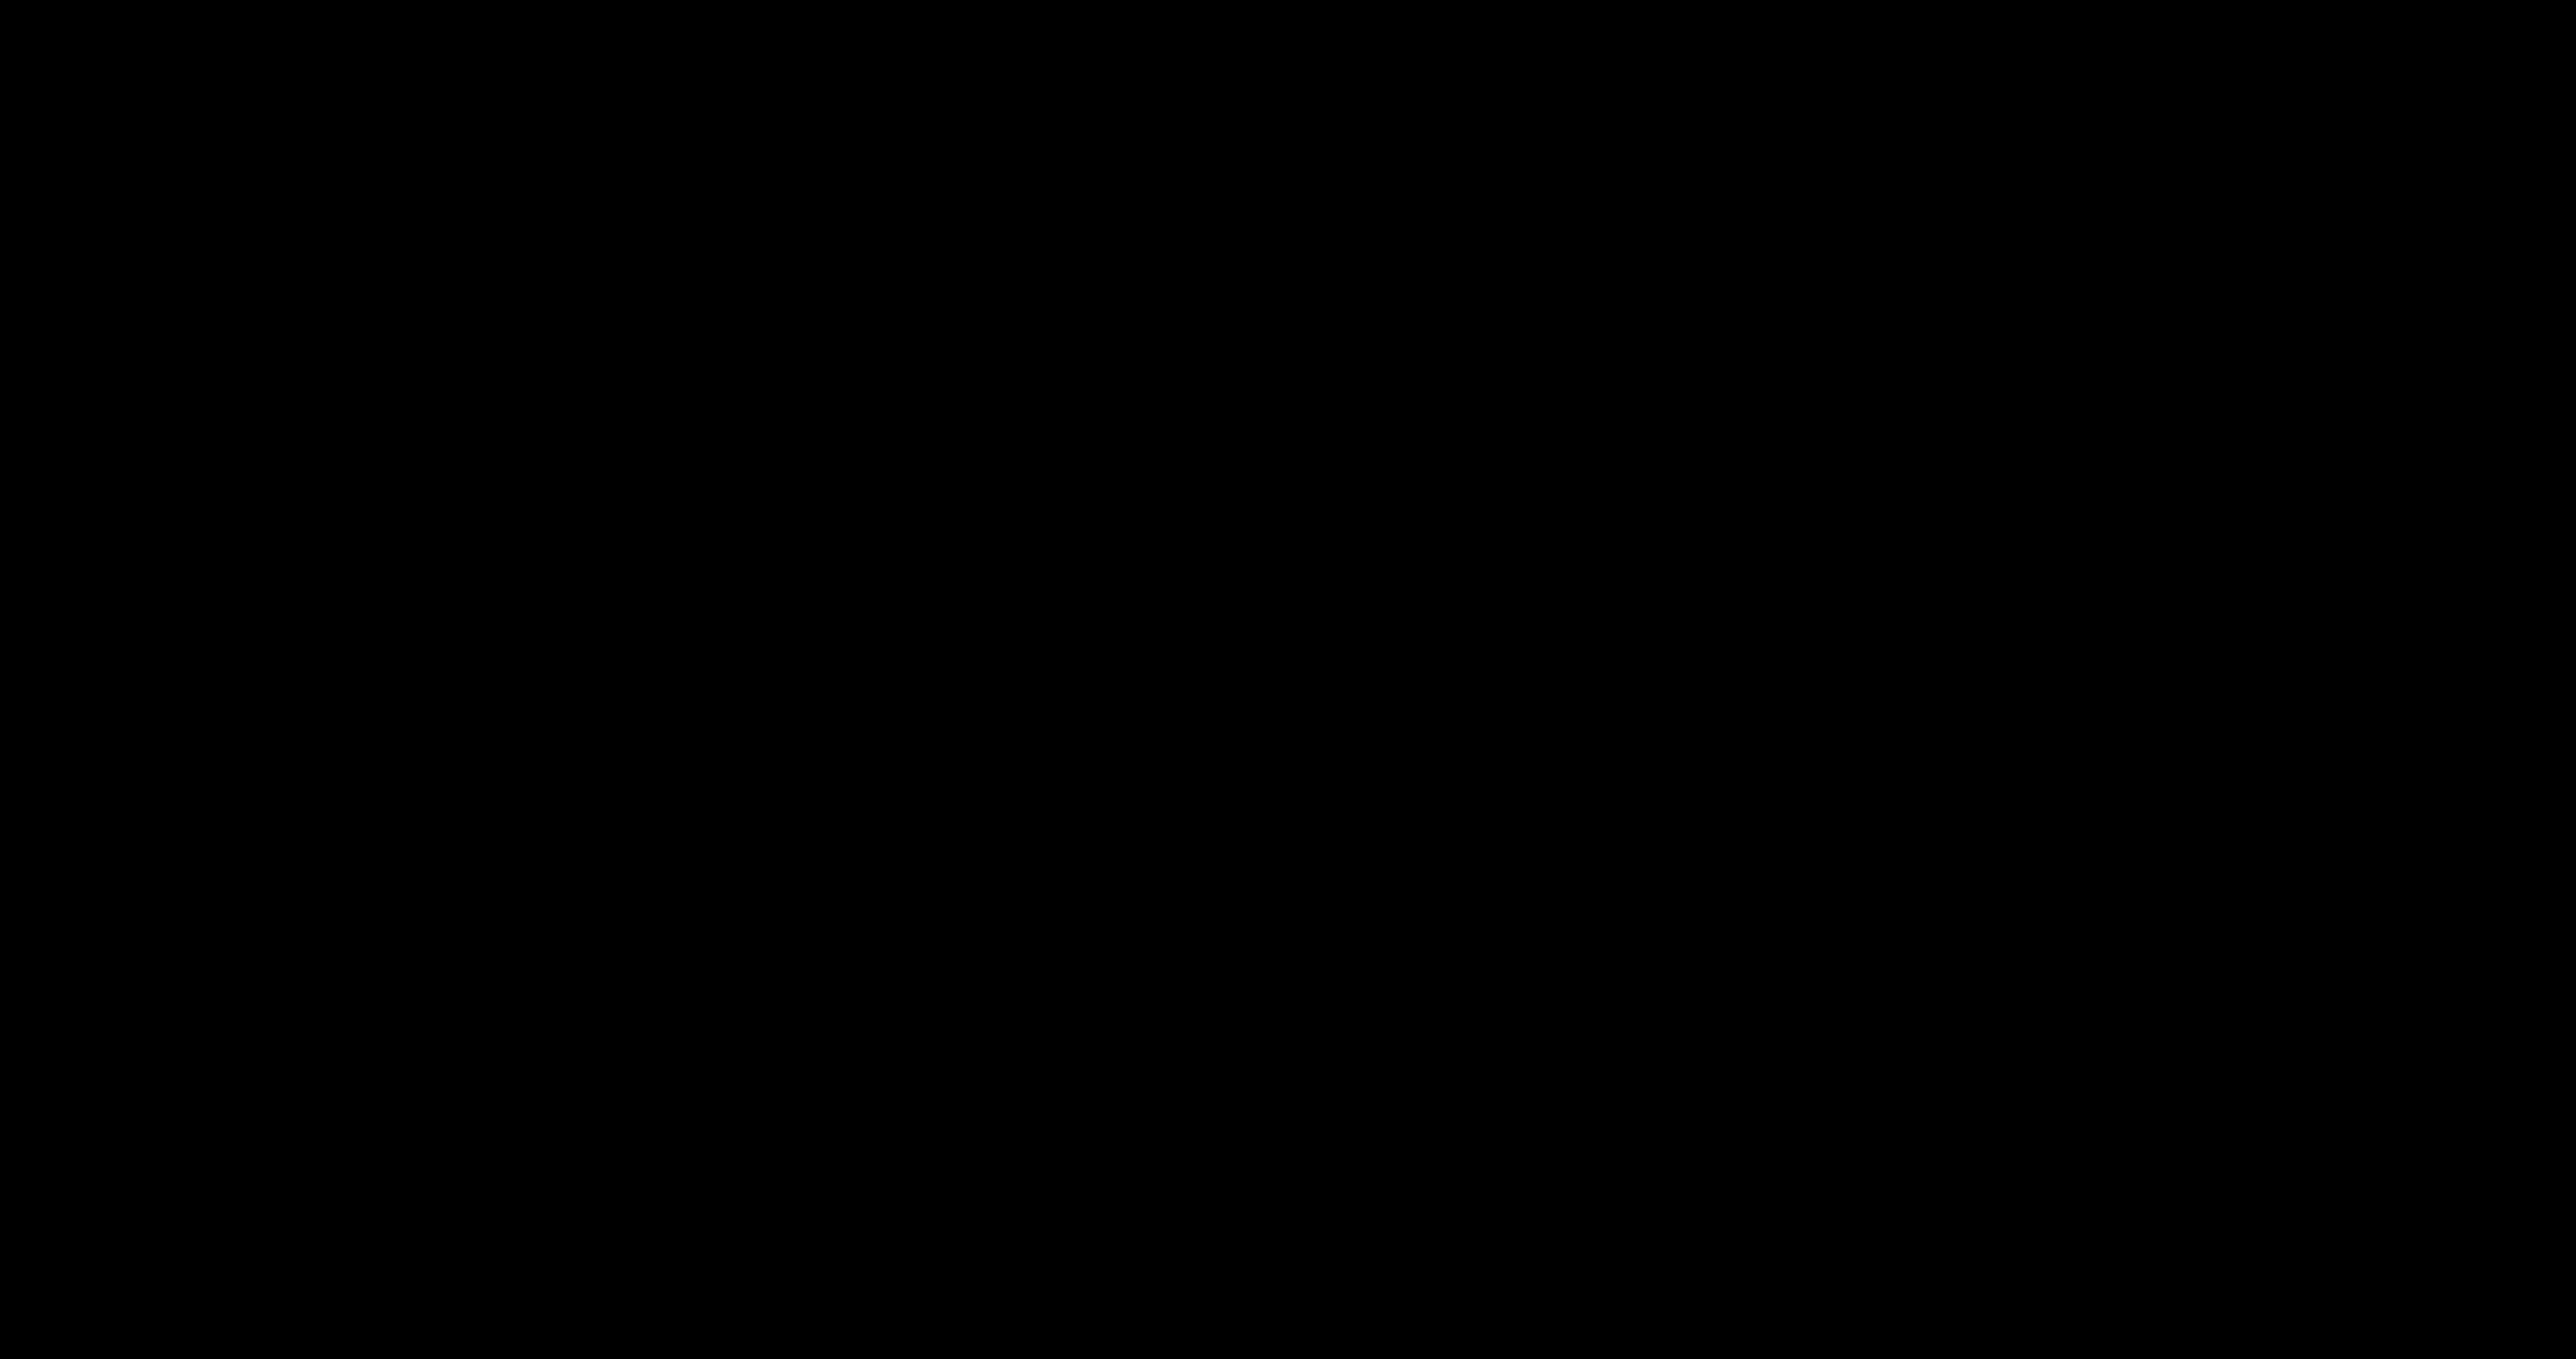

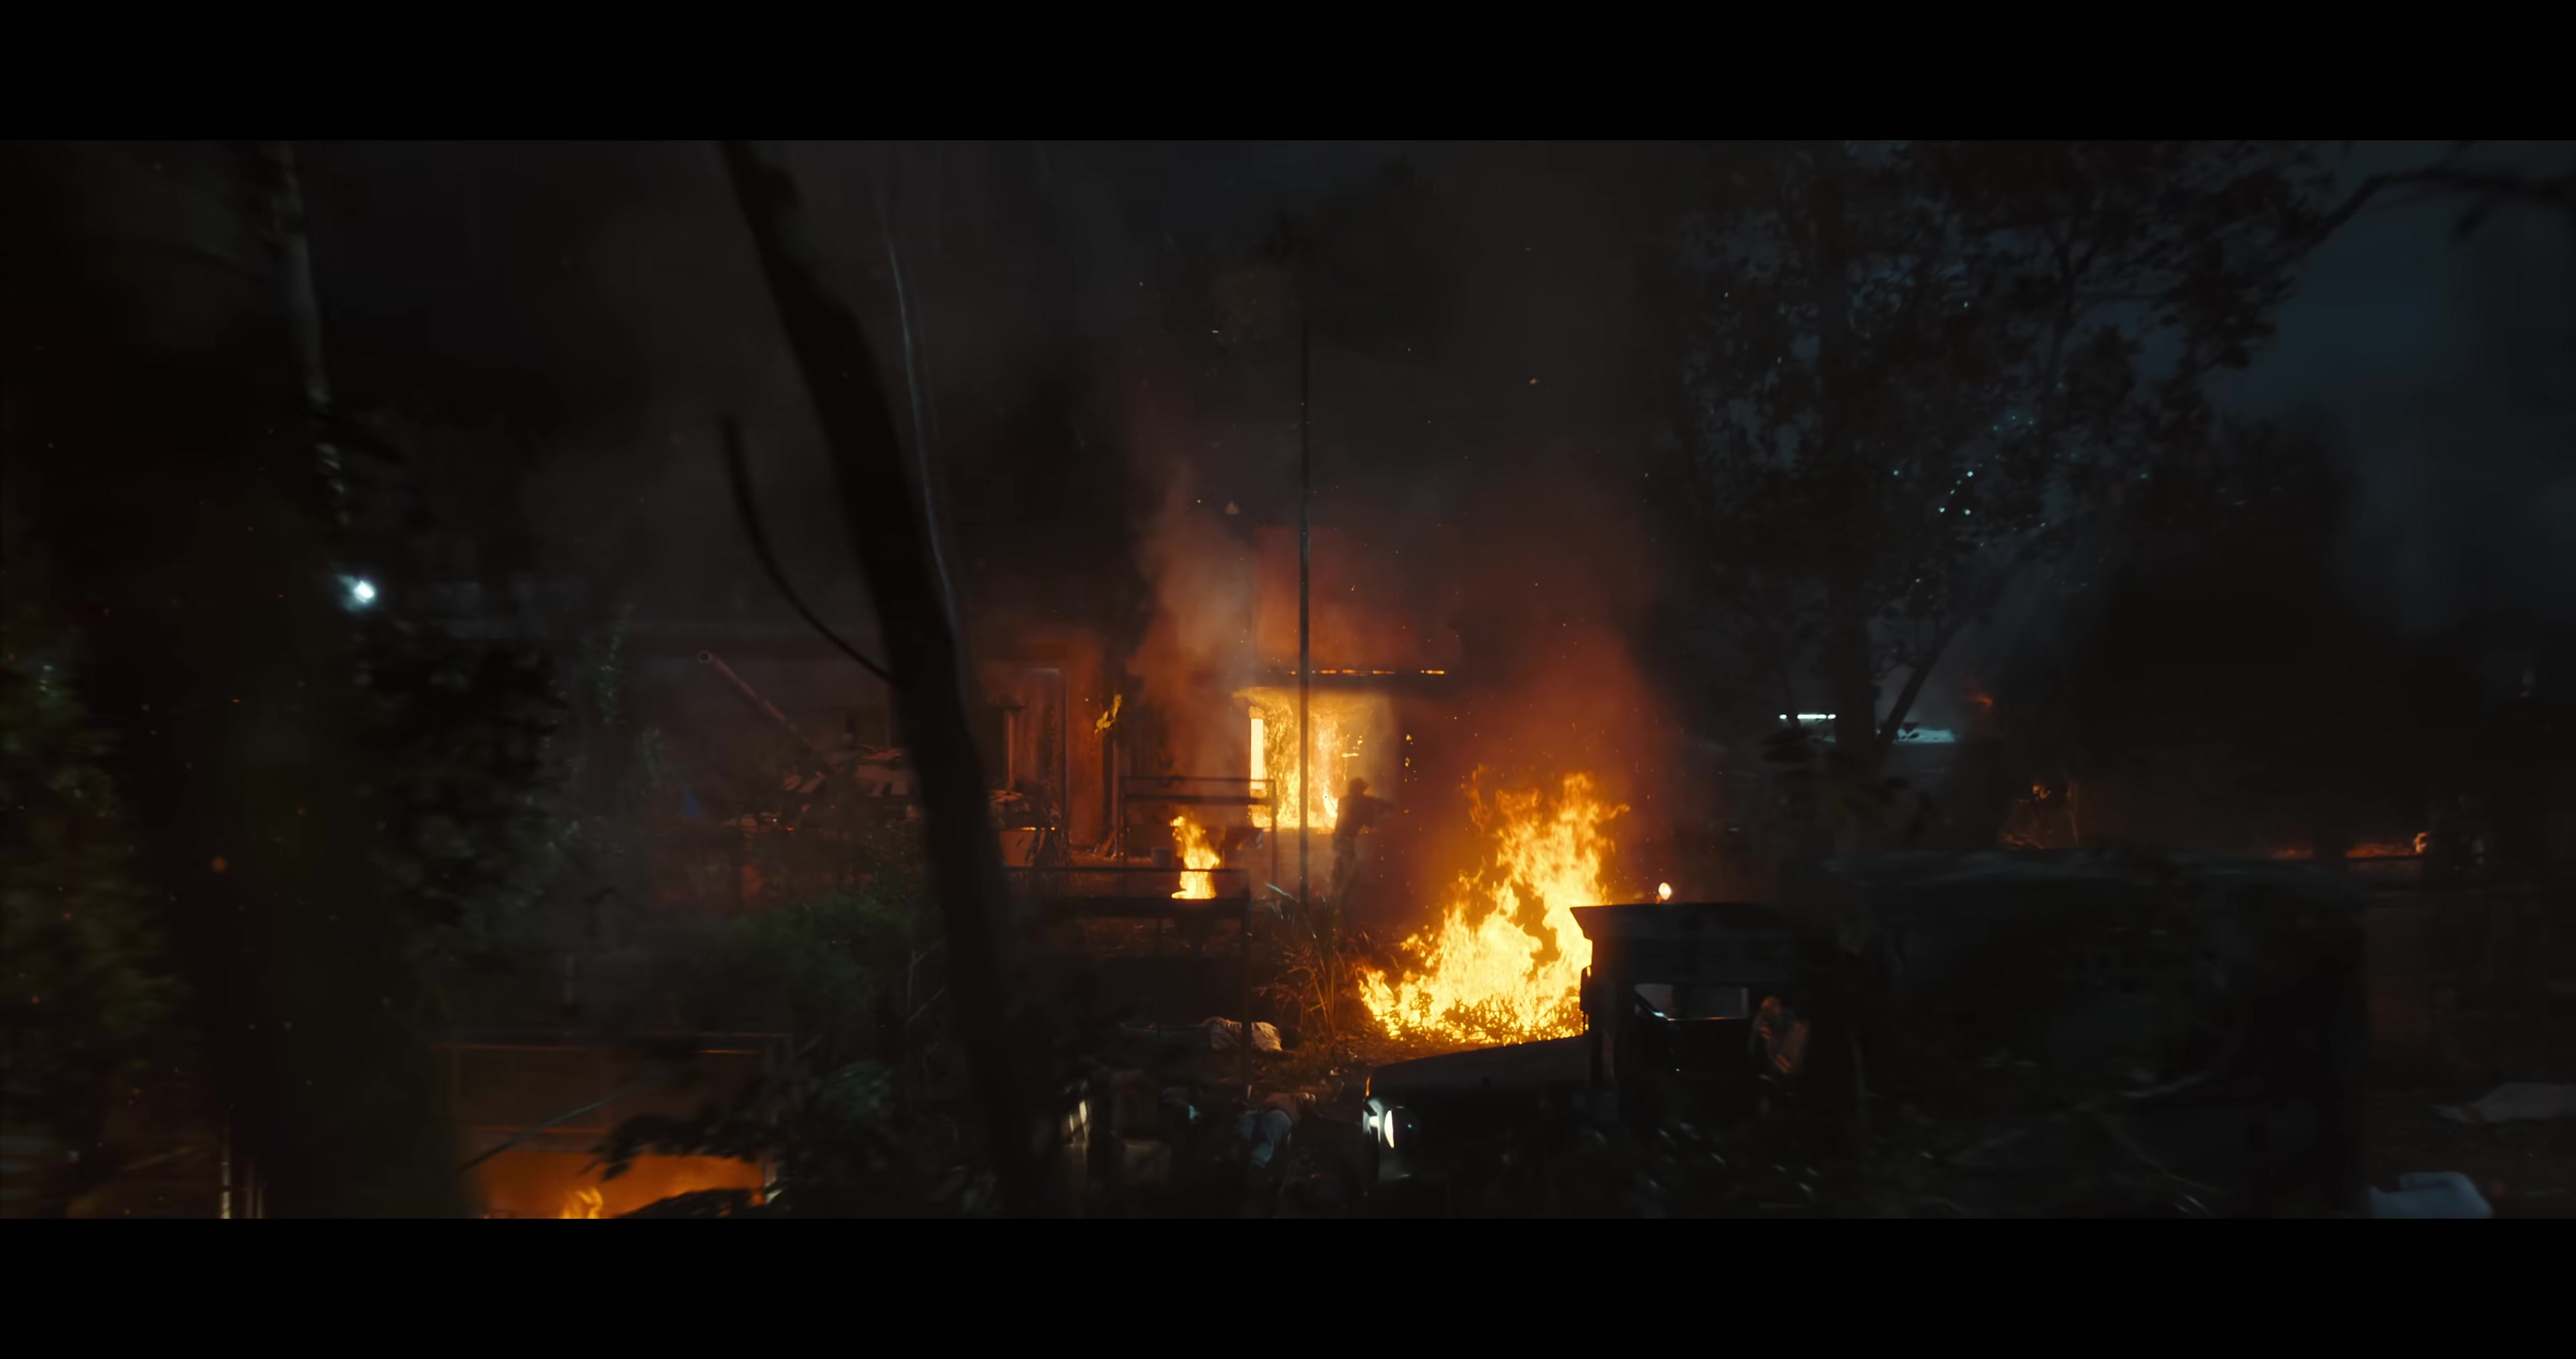

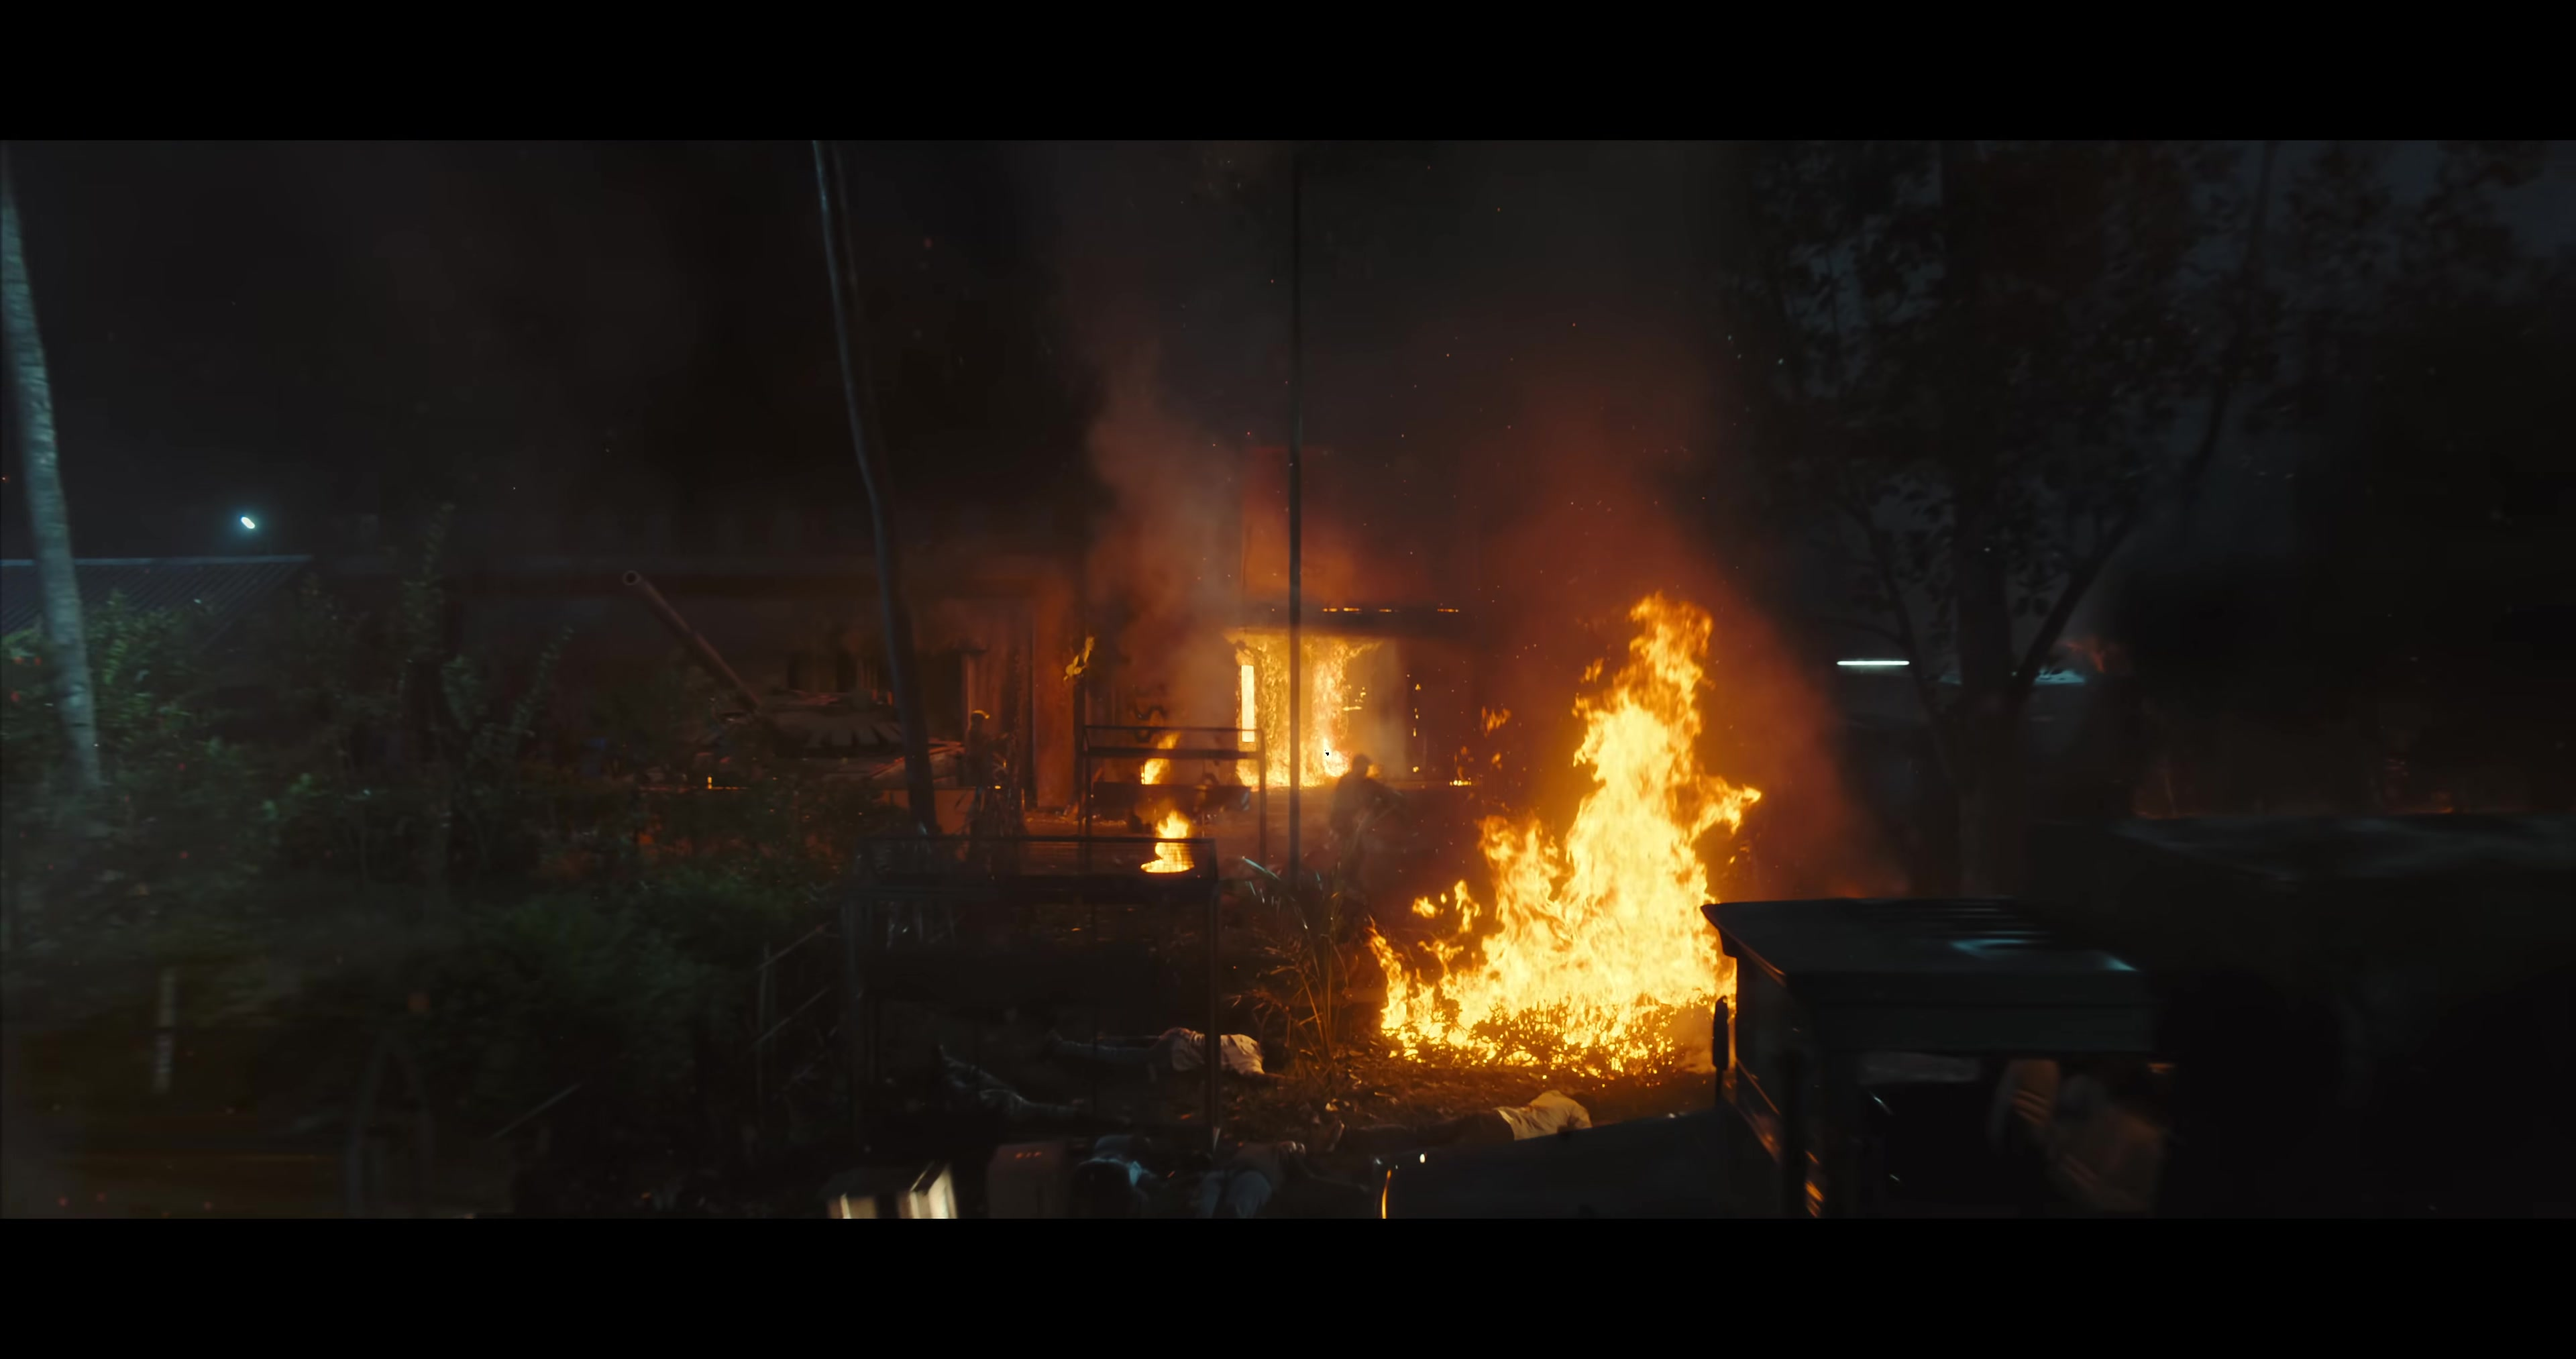

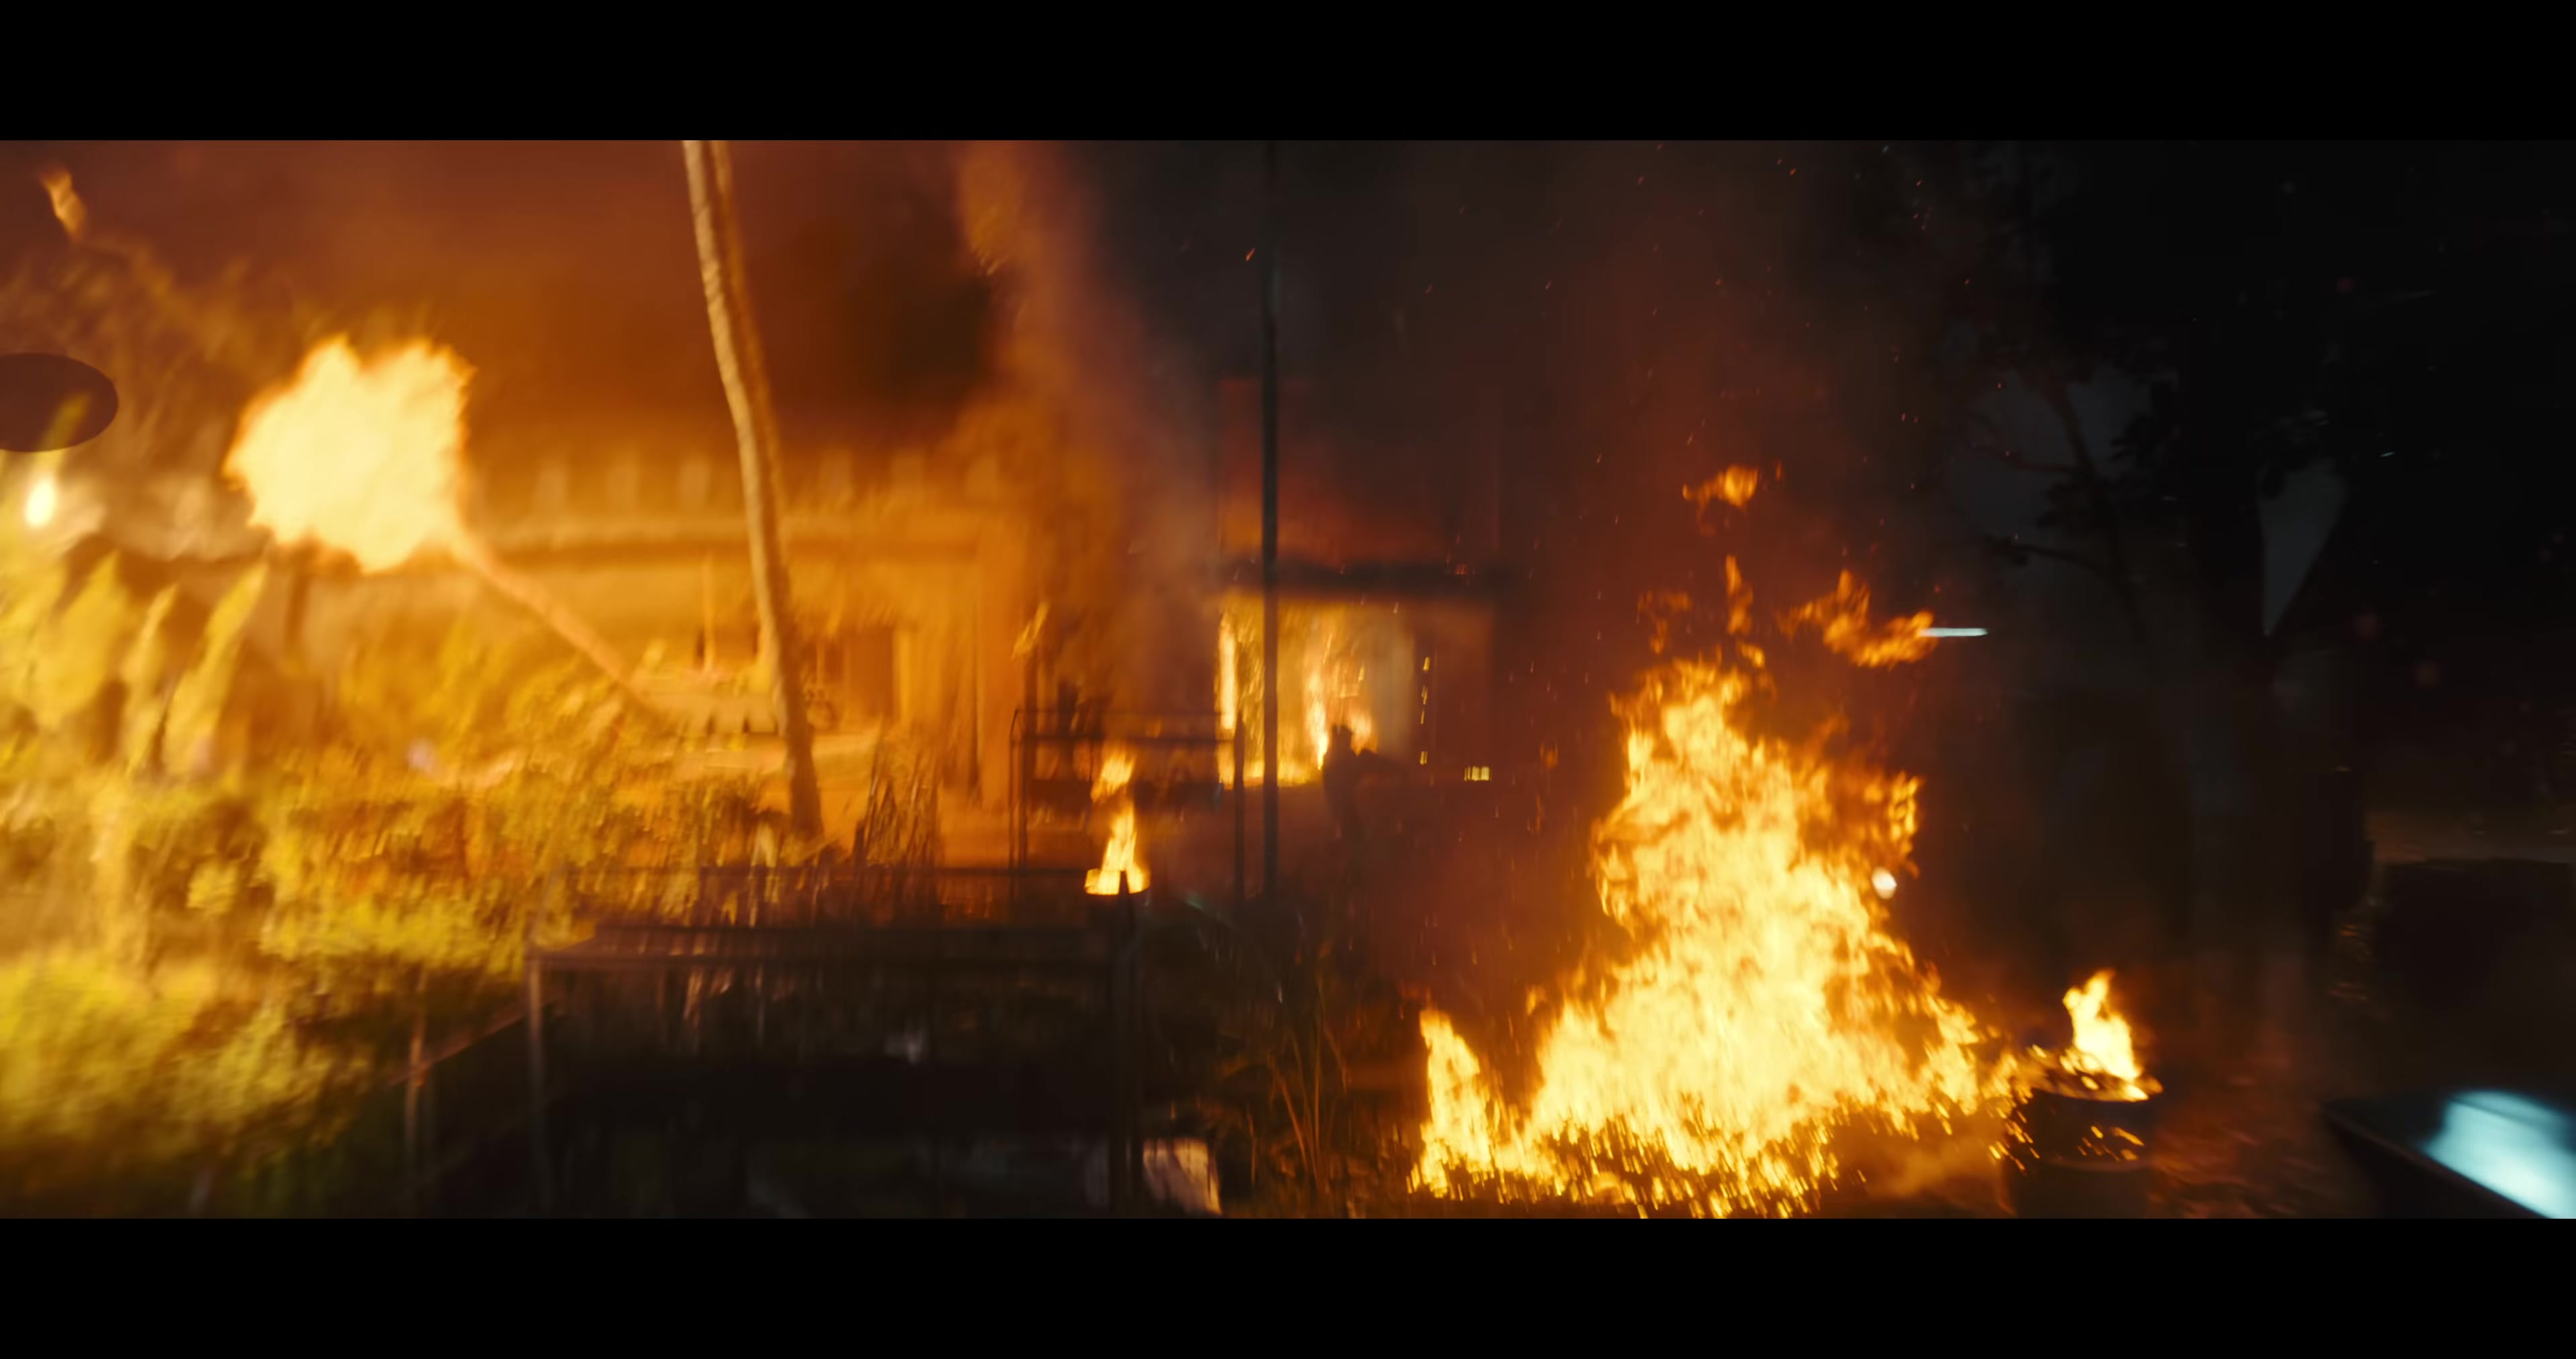

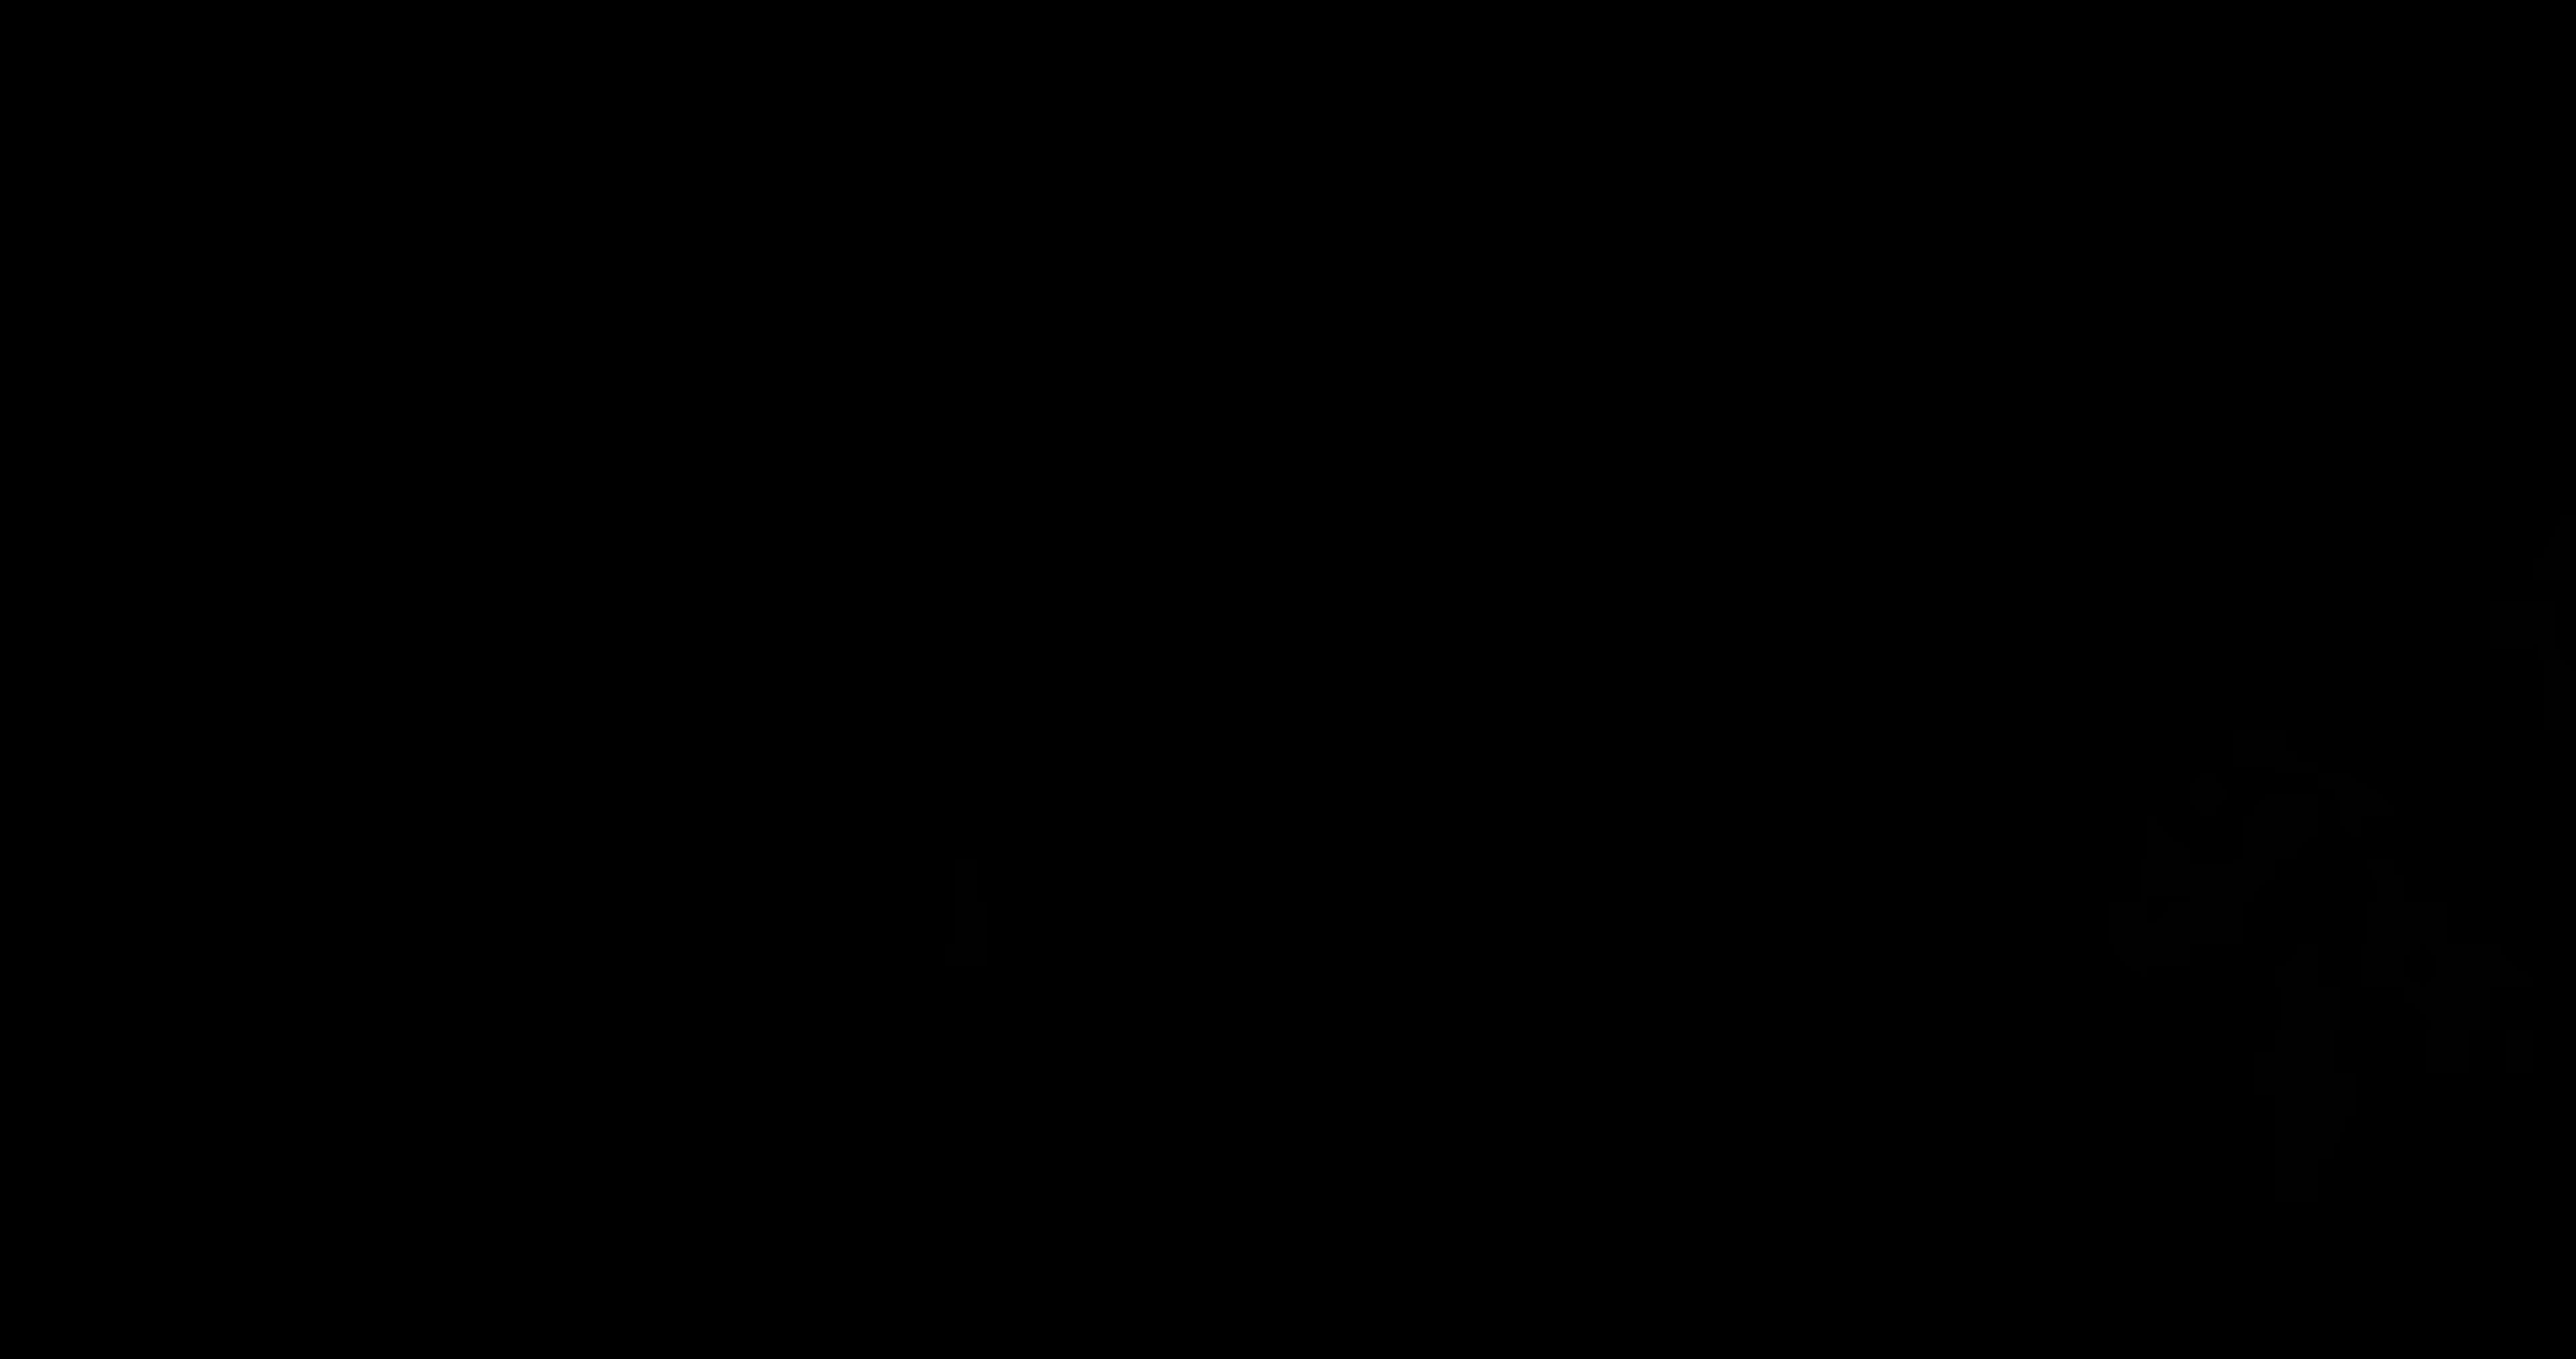

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#This python code runs extracted 133 frames from this youtube video link that i have provided , that is One frame per second that is 60+ 60 +13
#that is basically 2:14 mins of video

!pip install yt-dlp scenedetect ffmpeg-python --quiet

import os
import yt_dlp
import shutil
from google.colab import files
from scenedetect import detect, ContentDetector
import ffmpeg
from IPython.display import Image, display

# 1. Ask for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 2. Download video as MP4
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
    'merge_output_format': 'mp4',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 3. Scene detection
scene_list = detect(video_path, ContentDetector(threshold=12.0))
print(f"🔎 Detected {len(scene_list)} scenes.")

frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)
scene_frames = []

if len(scene_list) > 0:
    # Extract first frame of each scene using ffmpeg
    for i, scene in enumerate(scene_list):
        ts = scene[0].get_seconds()
        frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
        (
            ffmpeg
            .input(video_path, ss=ts)
            .output(frame_path, vframes=1)
            .run(capture_stdout=True, capture_stderr=True)
        )
        scene_frames.append(frame_path)
else:
    print("⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...")
    frame_pattern = os.path.join(frames_dir, "frame_%04d.jpg")
    (
        ffmpeg
        .input(video_path)
        .filter('fps', fps=1)  # 1 frame per second
        .output(frame_pattern)
        .run(capture_stdout=True, capture_stderr=True)
    )
    scene_frames = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir)])

print(f"✅ Extracted {len(scene_frames)} frames.")

# 4. Preview first few frames
for f in scene_frames[:5]:
    display(Image(filename=f))

# 5. Download as ZIP
if scene_frames:
    shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
    files.download("/content/scene_frames.zip")
else:
    print("⚠️ Still no frames extracted - check video manually.")


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/64XHtNWTB5o
[youtube] Extracting URL: https://youtu.be/64XHtNWTB5o
[youtube] 64XHtNWTB5o: Downloading webpage
[youtube] 64XHtNWTB5o: Downloading tv simply player API JSON
[youtube] 64XHtNWTB5o: Downloading tv client config
[youtube] 64XHtNWTB5o: Downloading tv player API JSON
[info] 64XHtNWTB5o: Downloading 1 format(s): 401+140
[download] /content/videos/video.mp4 has already been downloaded


INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.mp4
🔎 Detected 0 scenes.
⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...
✅ Extracted 134 frames.


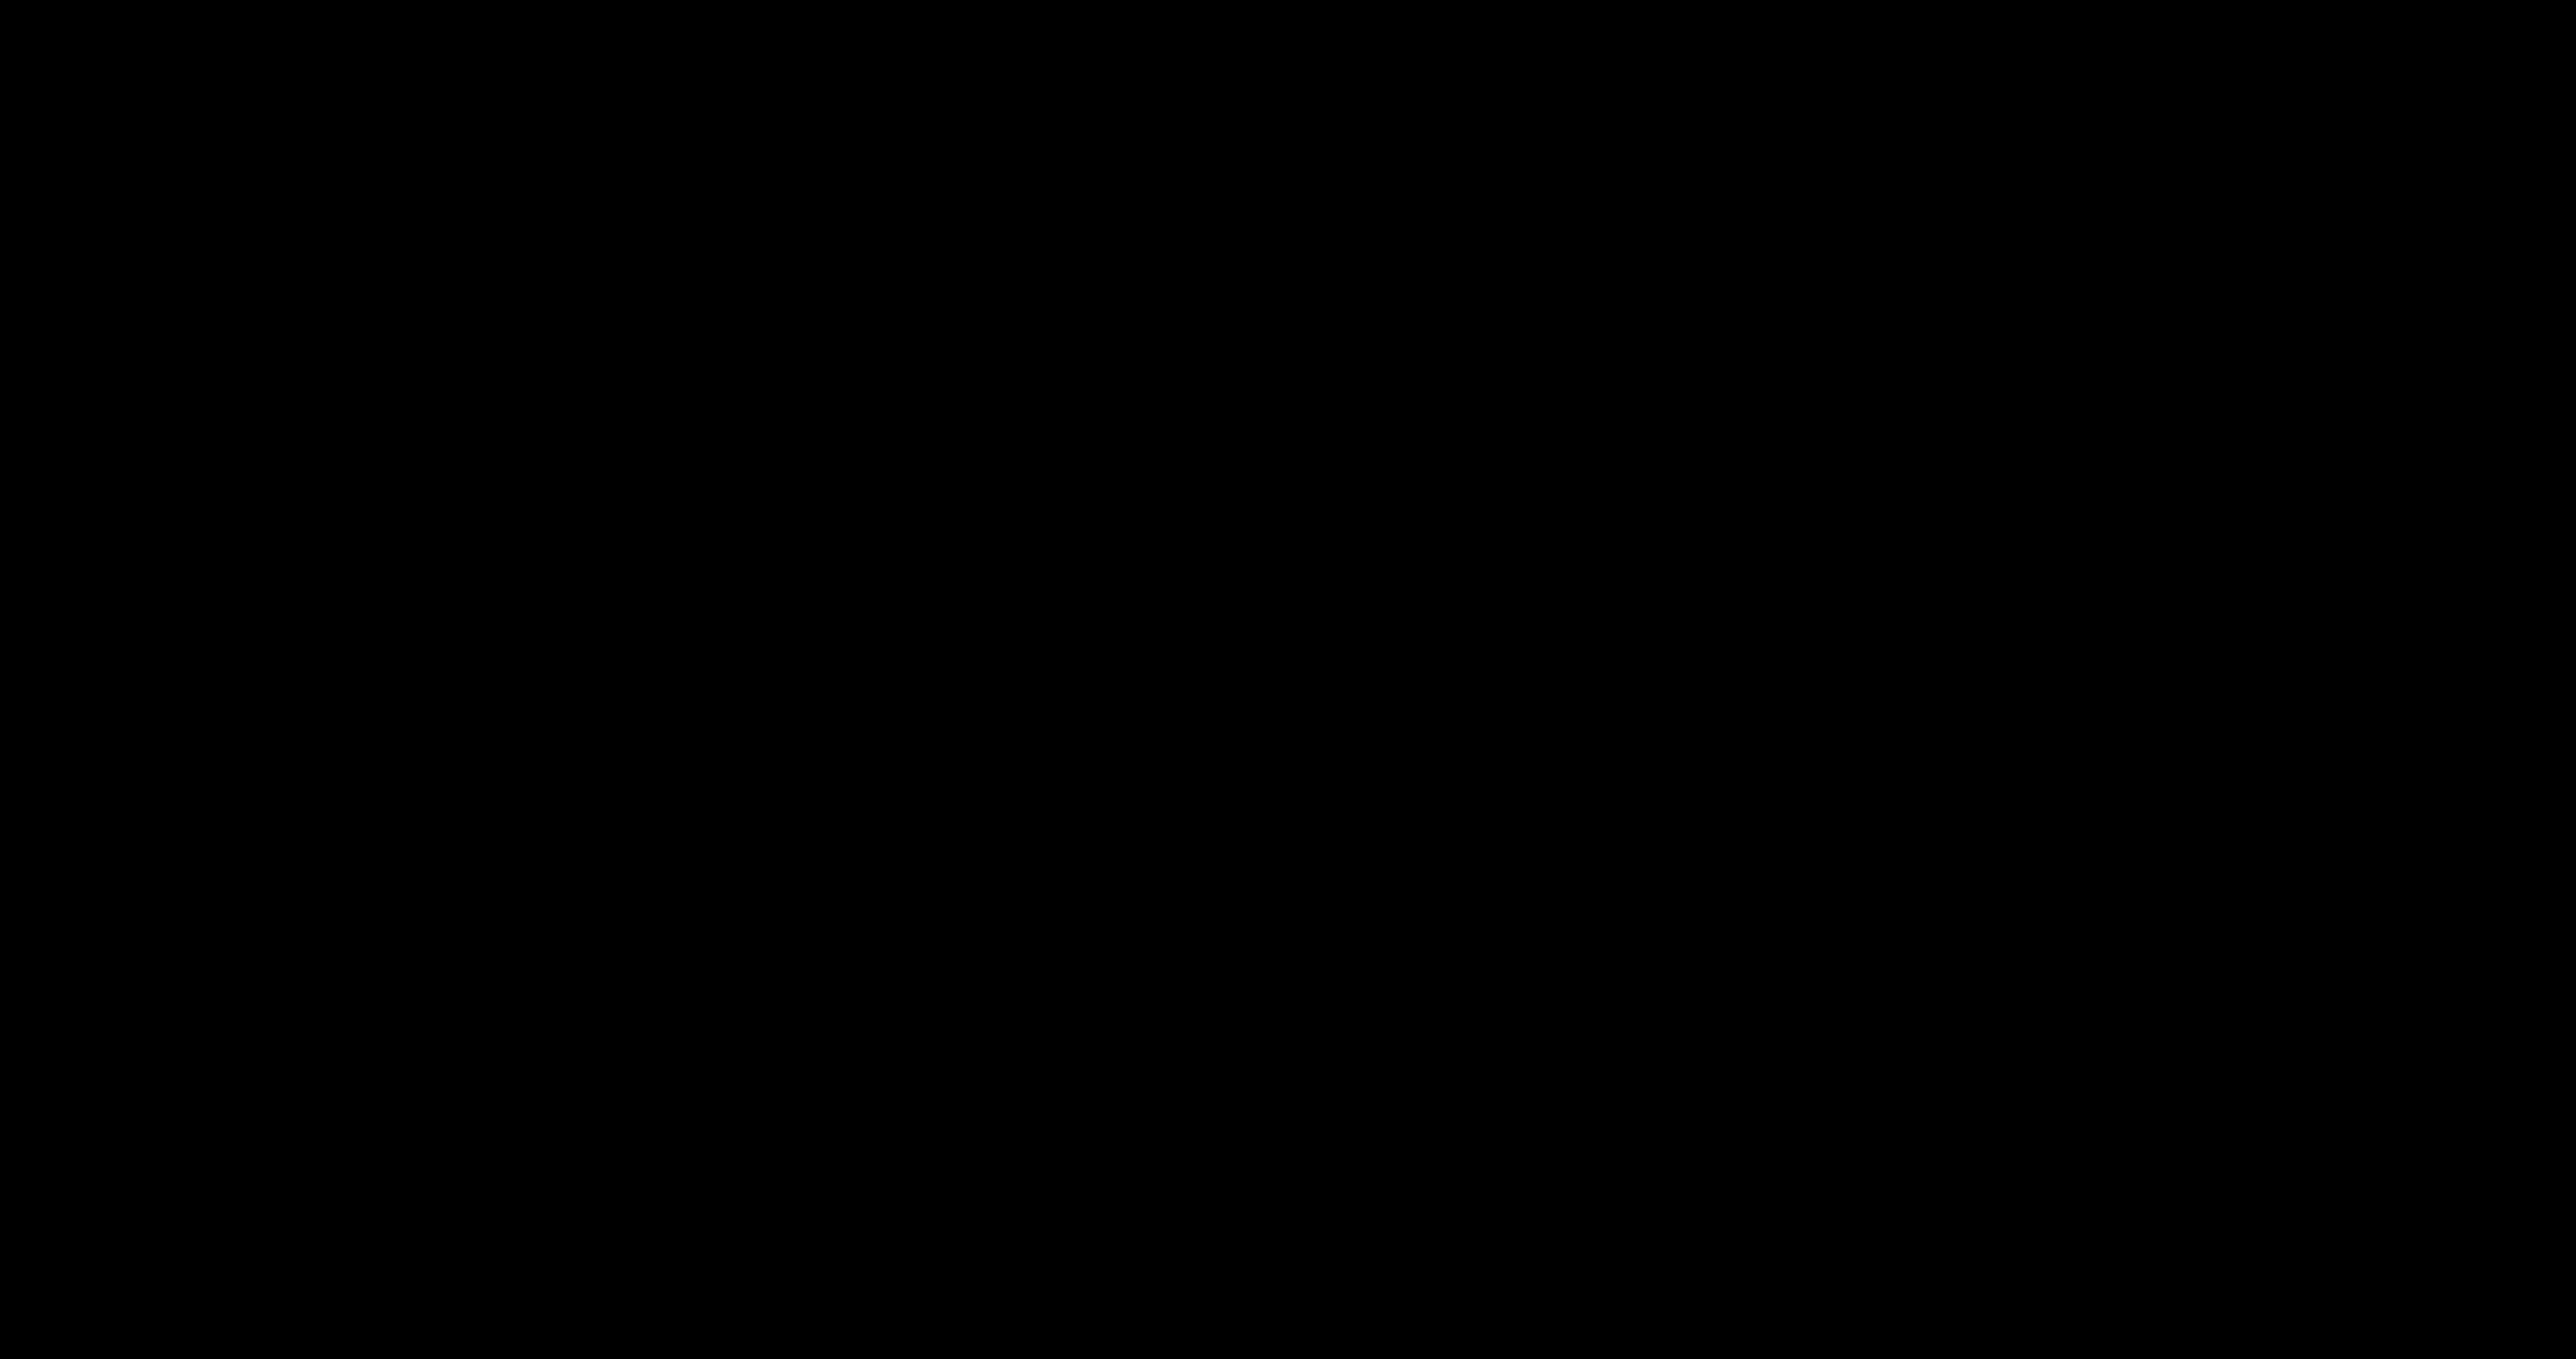

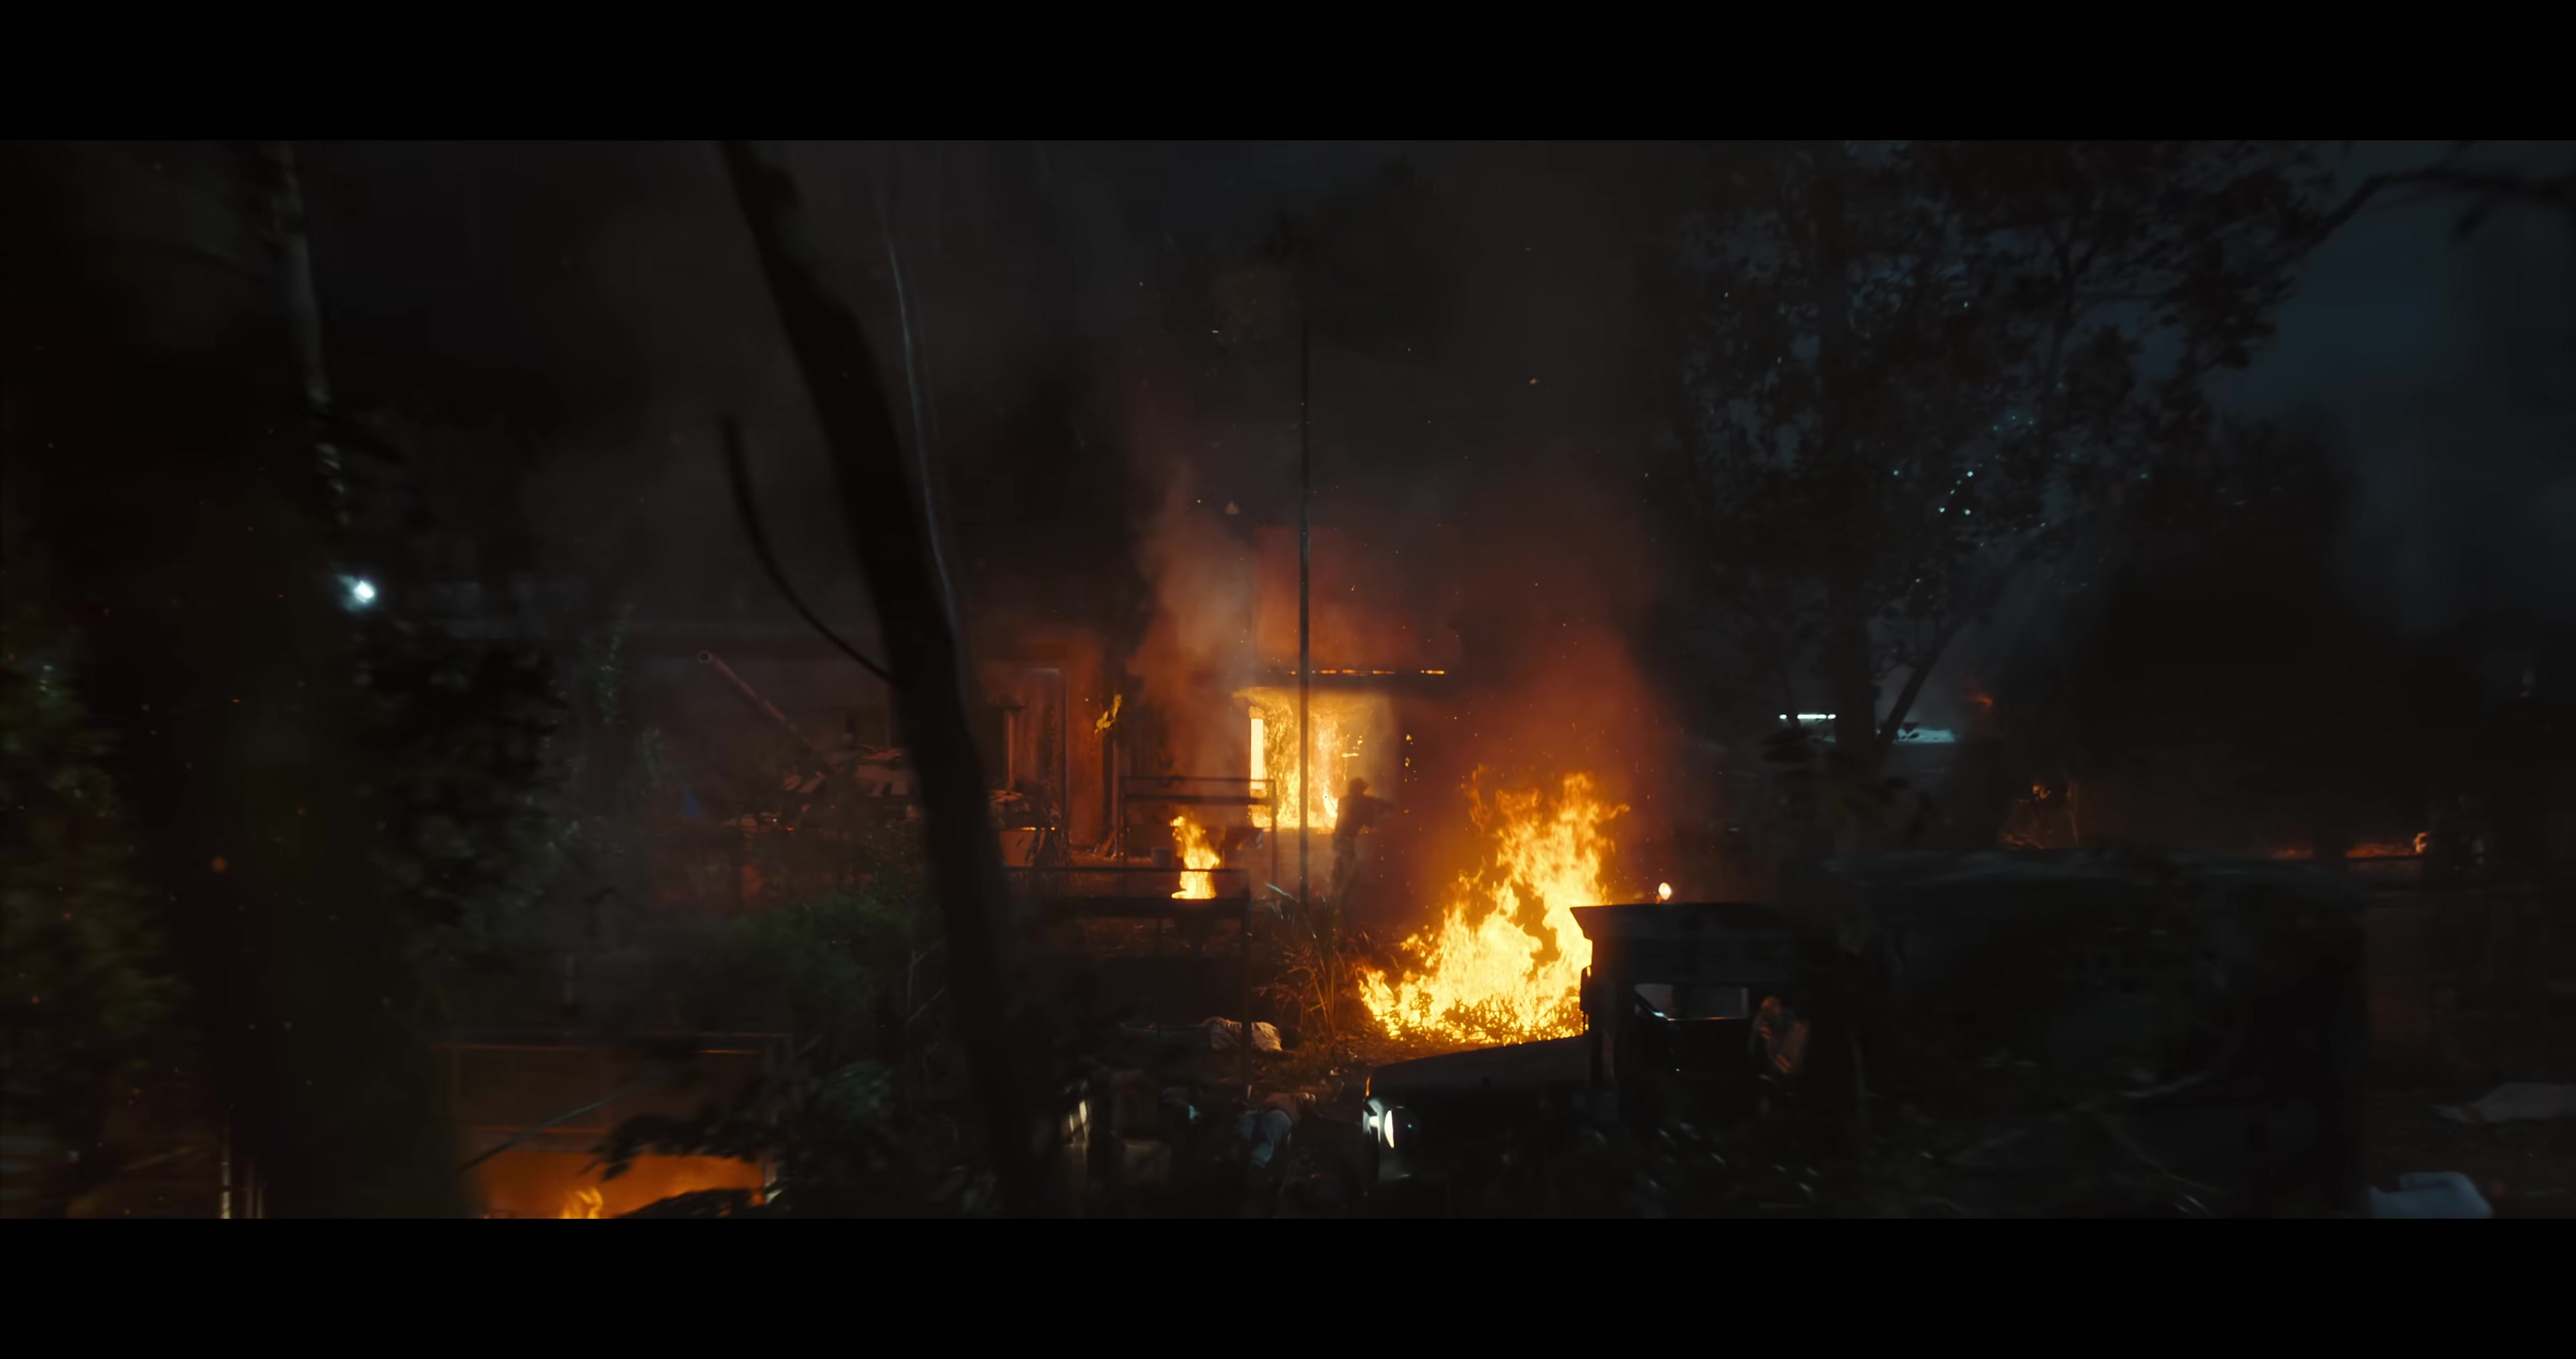

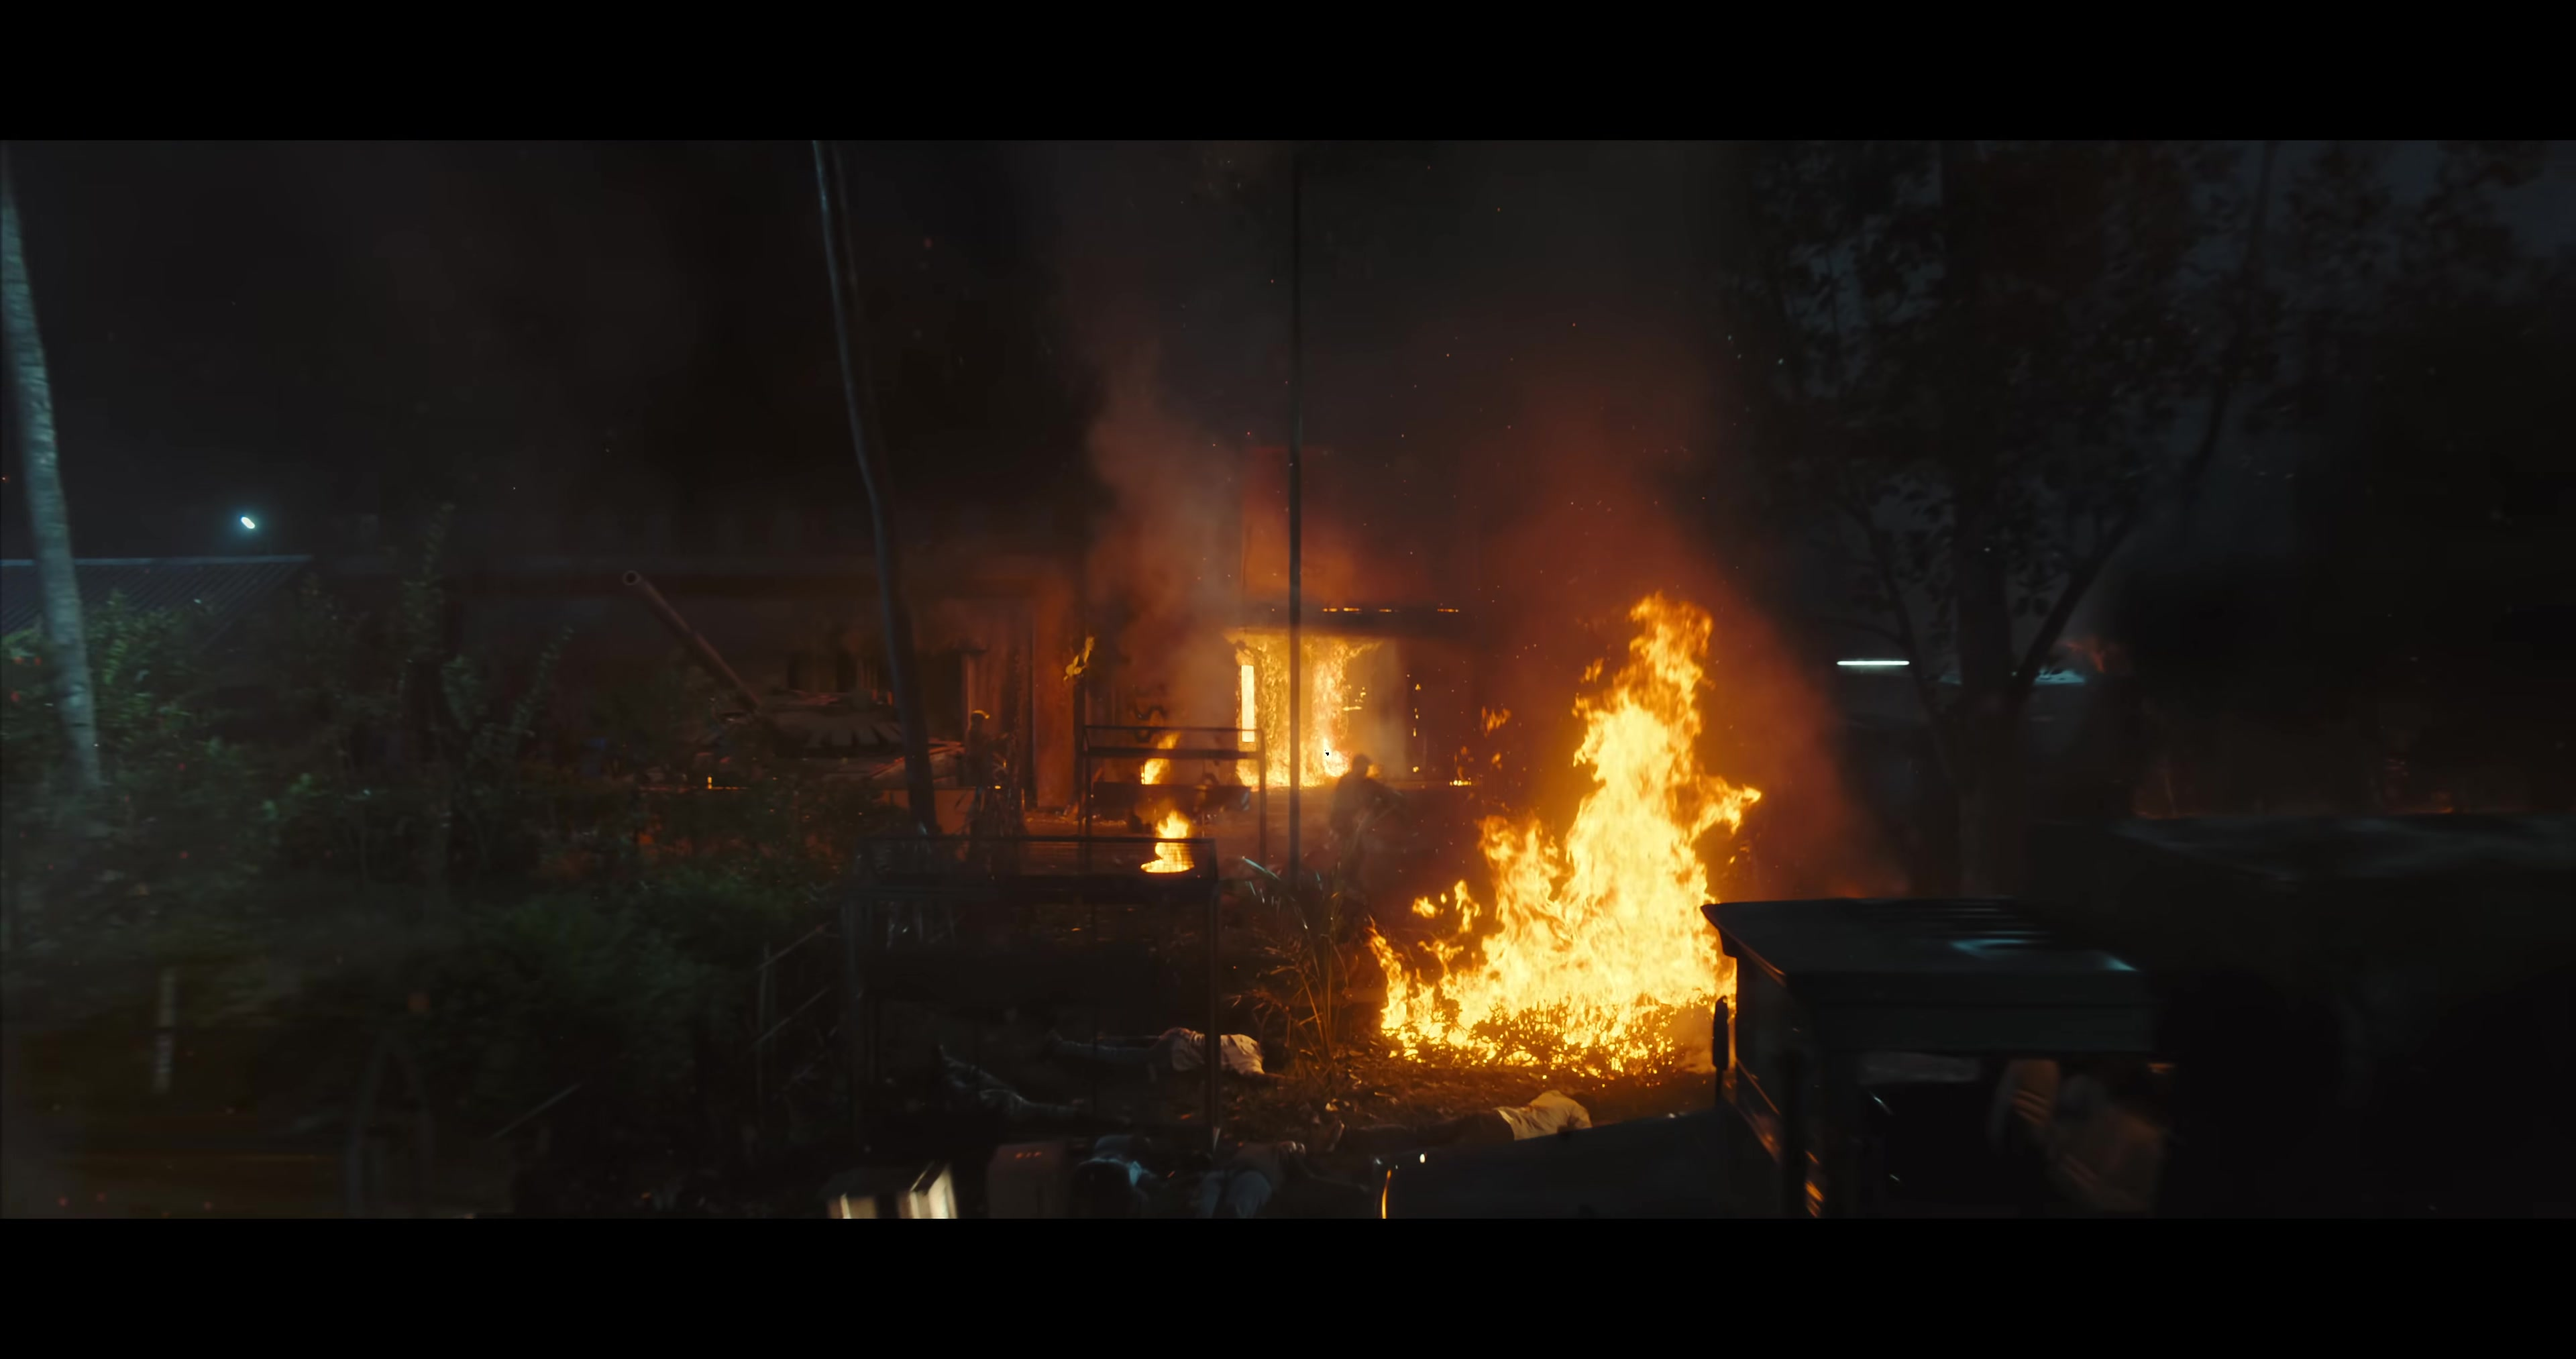

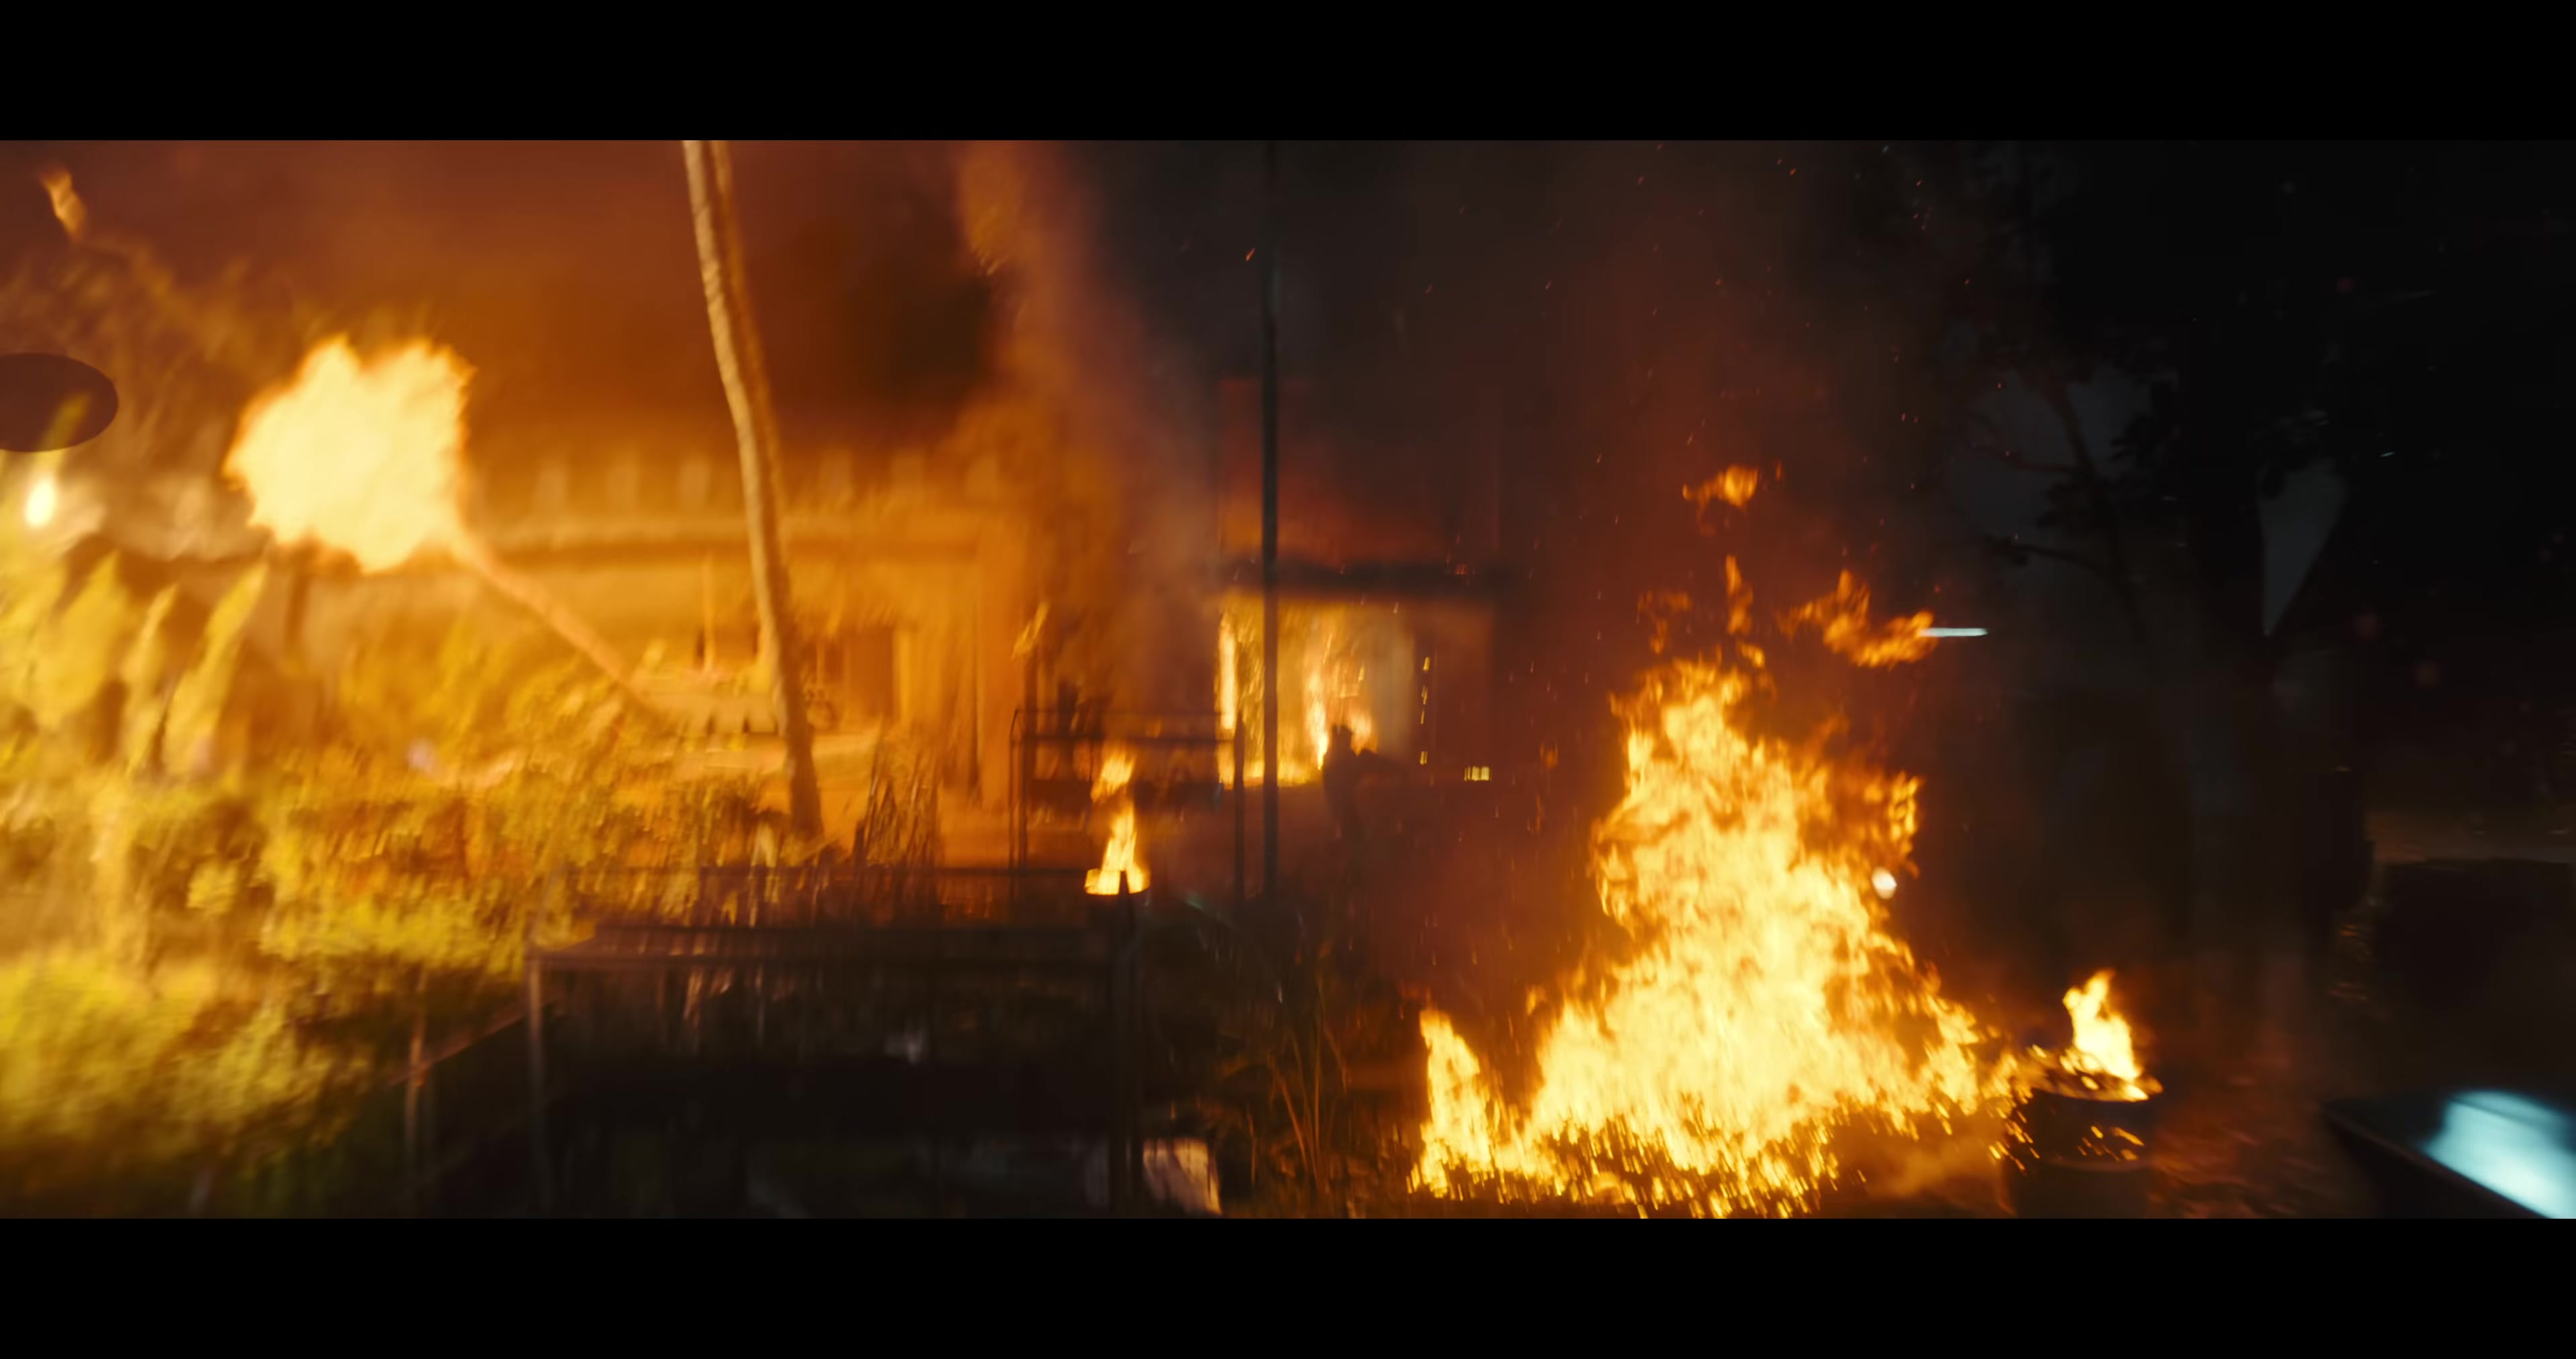

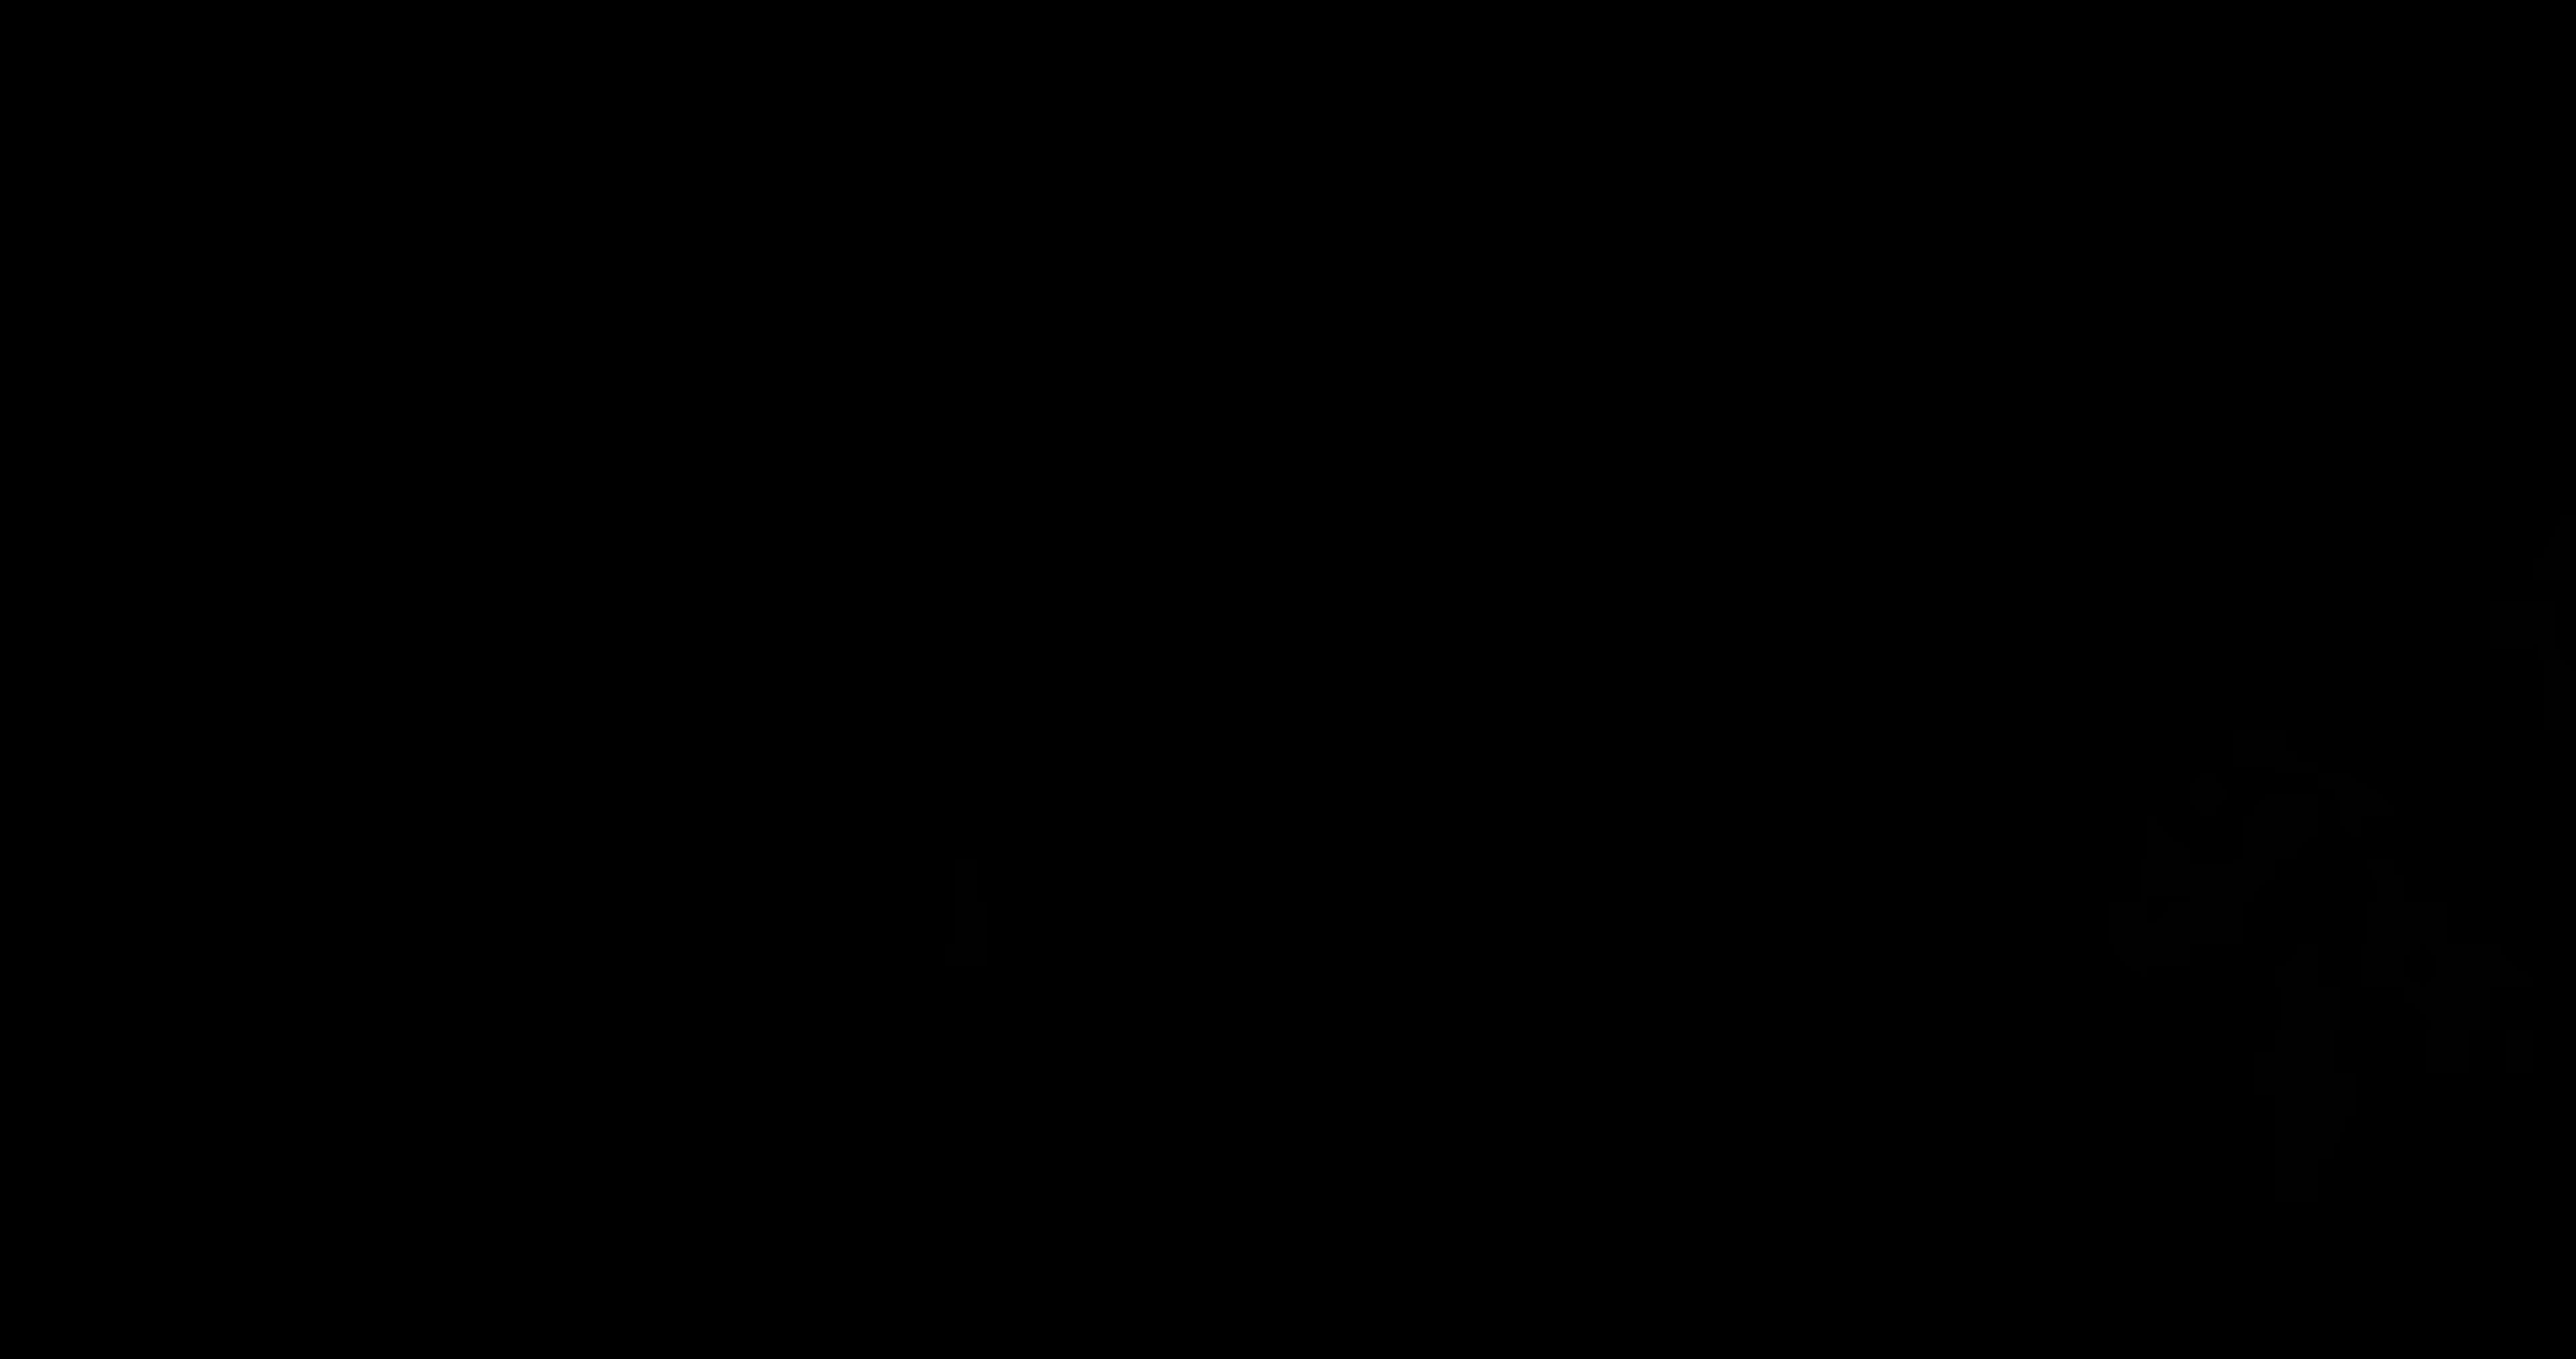

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install yt-dlp scenedetect ffmpeg-python --quiet

import os
import yt_dlp
import shutil
from google.colab import files
from scenedetect import detect, ContentDetector
import ffmpeg
from IPython.display import Image, display

# 1. Ask for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 2. Download video as MP4
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
    'merge_output_format': 'mp4',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
}
with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 3. Scene detection
scene_list = detect(video_path, ContentDetector(threshold=12.0))
print(f"🔎 Detected {len(scene_list)} scenes.")

frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)
scene_frames = []

if len(scene_list) > 0:
    # Extract first frame of each scene using ffmpeg
    for i, scene in enumerate(scene_list):
        ts = scene[0].get_seconds()
        frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
        (
            ffmpeg
            .input(video_path, ss=ts)
            .output(frame_path, vframes=1)
            .run(capture_stdout=True, capture_stderr=True)
        )
        scene_frames.append(frame_path)
else:
    print("⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...")
    frame_pattern = os.path.join(frames_dir, "frame_%04d.jpg")
    (
        ffmpeg
        .input(video_path)
        .filter('fps', fps=1)  # 1 frame per second
        .output(frame_pattern)
        .run(capture_stdout=True, capture_stderr=True)
    )
    scene_frames = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir)])

print(f"✅ Extracted {len(scene_frames)} frames.")

# 4. Preview first few frames
for f in scene_frames[:5]:
    display(Image(filename=f))

# 5. Download as ZIP
if scene_frames:
    shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
    files.download("/content/scene_frames.zip")
else:
    print("⚠️ Still no frames extracted - check video manually.")


🎬 Enter a video link (YouTube/Instagram/TikTok): https://youtu.be/u1Pz6OVZ5js
[youtube] Extracting URL: https://youtu.be/u1Pz6OVZ5js
[youtube] u1Pz6OVZ5js: Downloading webpage
[youtube] u1Pz6OVZ5js: Downloading tv client config
[youtube] u1Pz6OVZ5js: Downloading tv player API JSON
[youtube] u1Pz6OVZ5js: Downloading web safari player API JSON
[youtube] u1Pz6OVZ5js: Downloading m3u8 information
[info] u1Pz6OVZ5js: Downloading 1 format(s): 401+140
[download] /content/videos/video.mp4 has already been downloaded


INFO:pyscenedetect:Detecting scenes...


✅ Video downloaded at: /content/videos/video.mp4
🔎 Detected 0 scenes.
⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...
✅ Extracted 3210 frames.


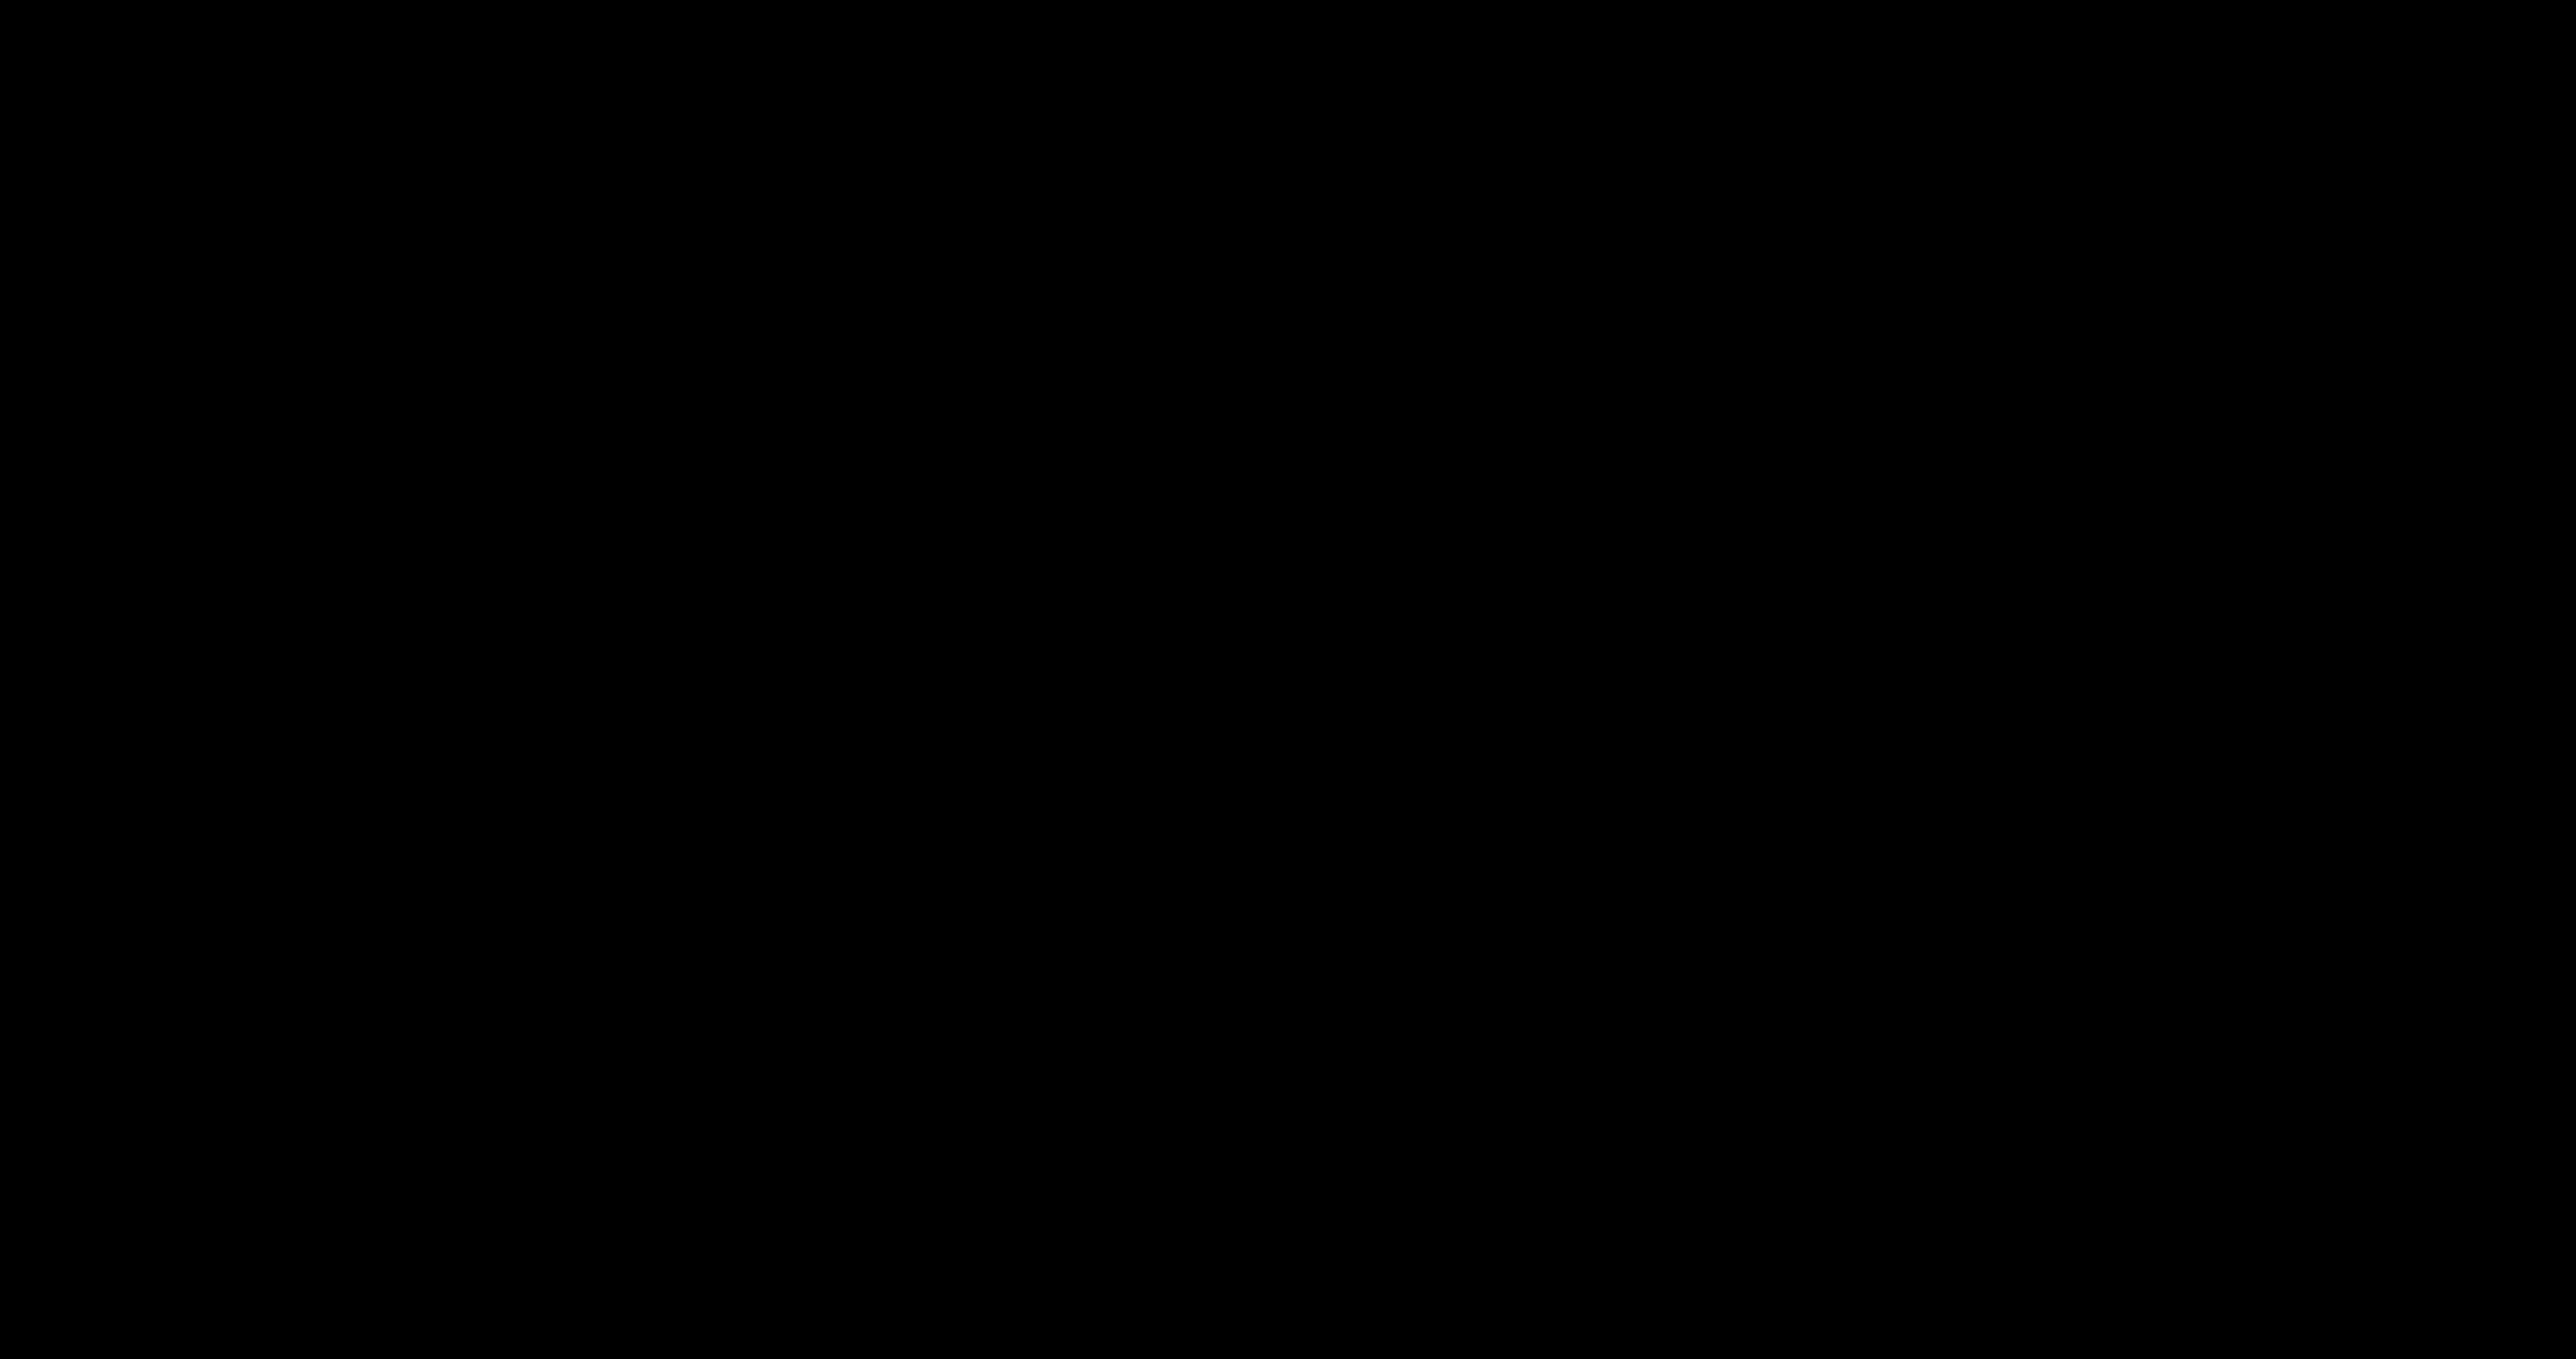

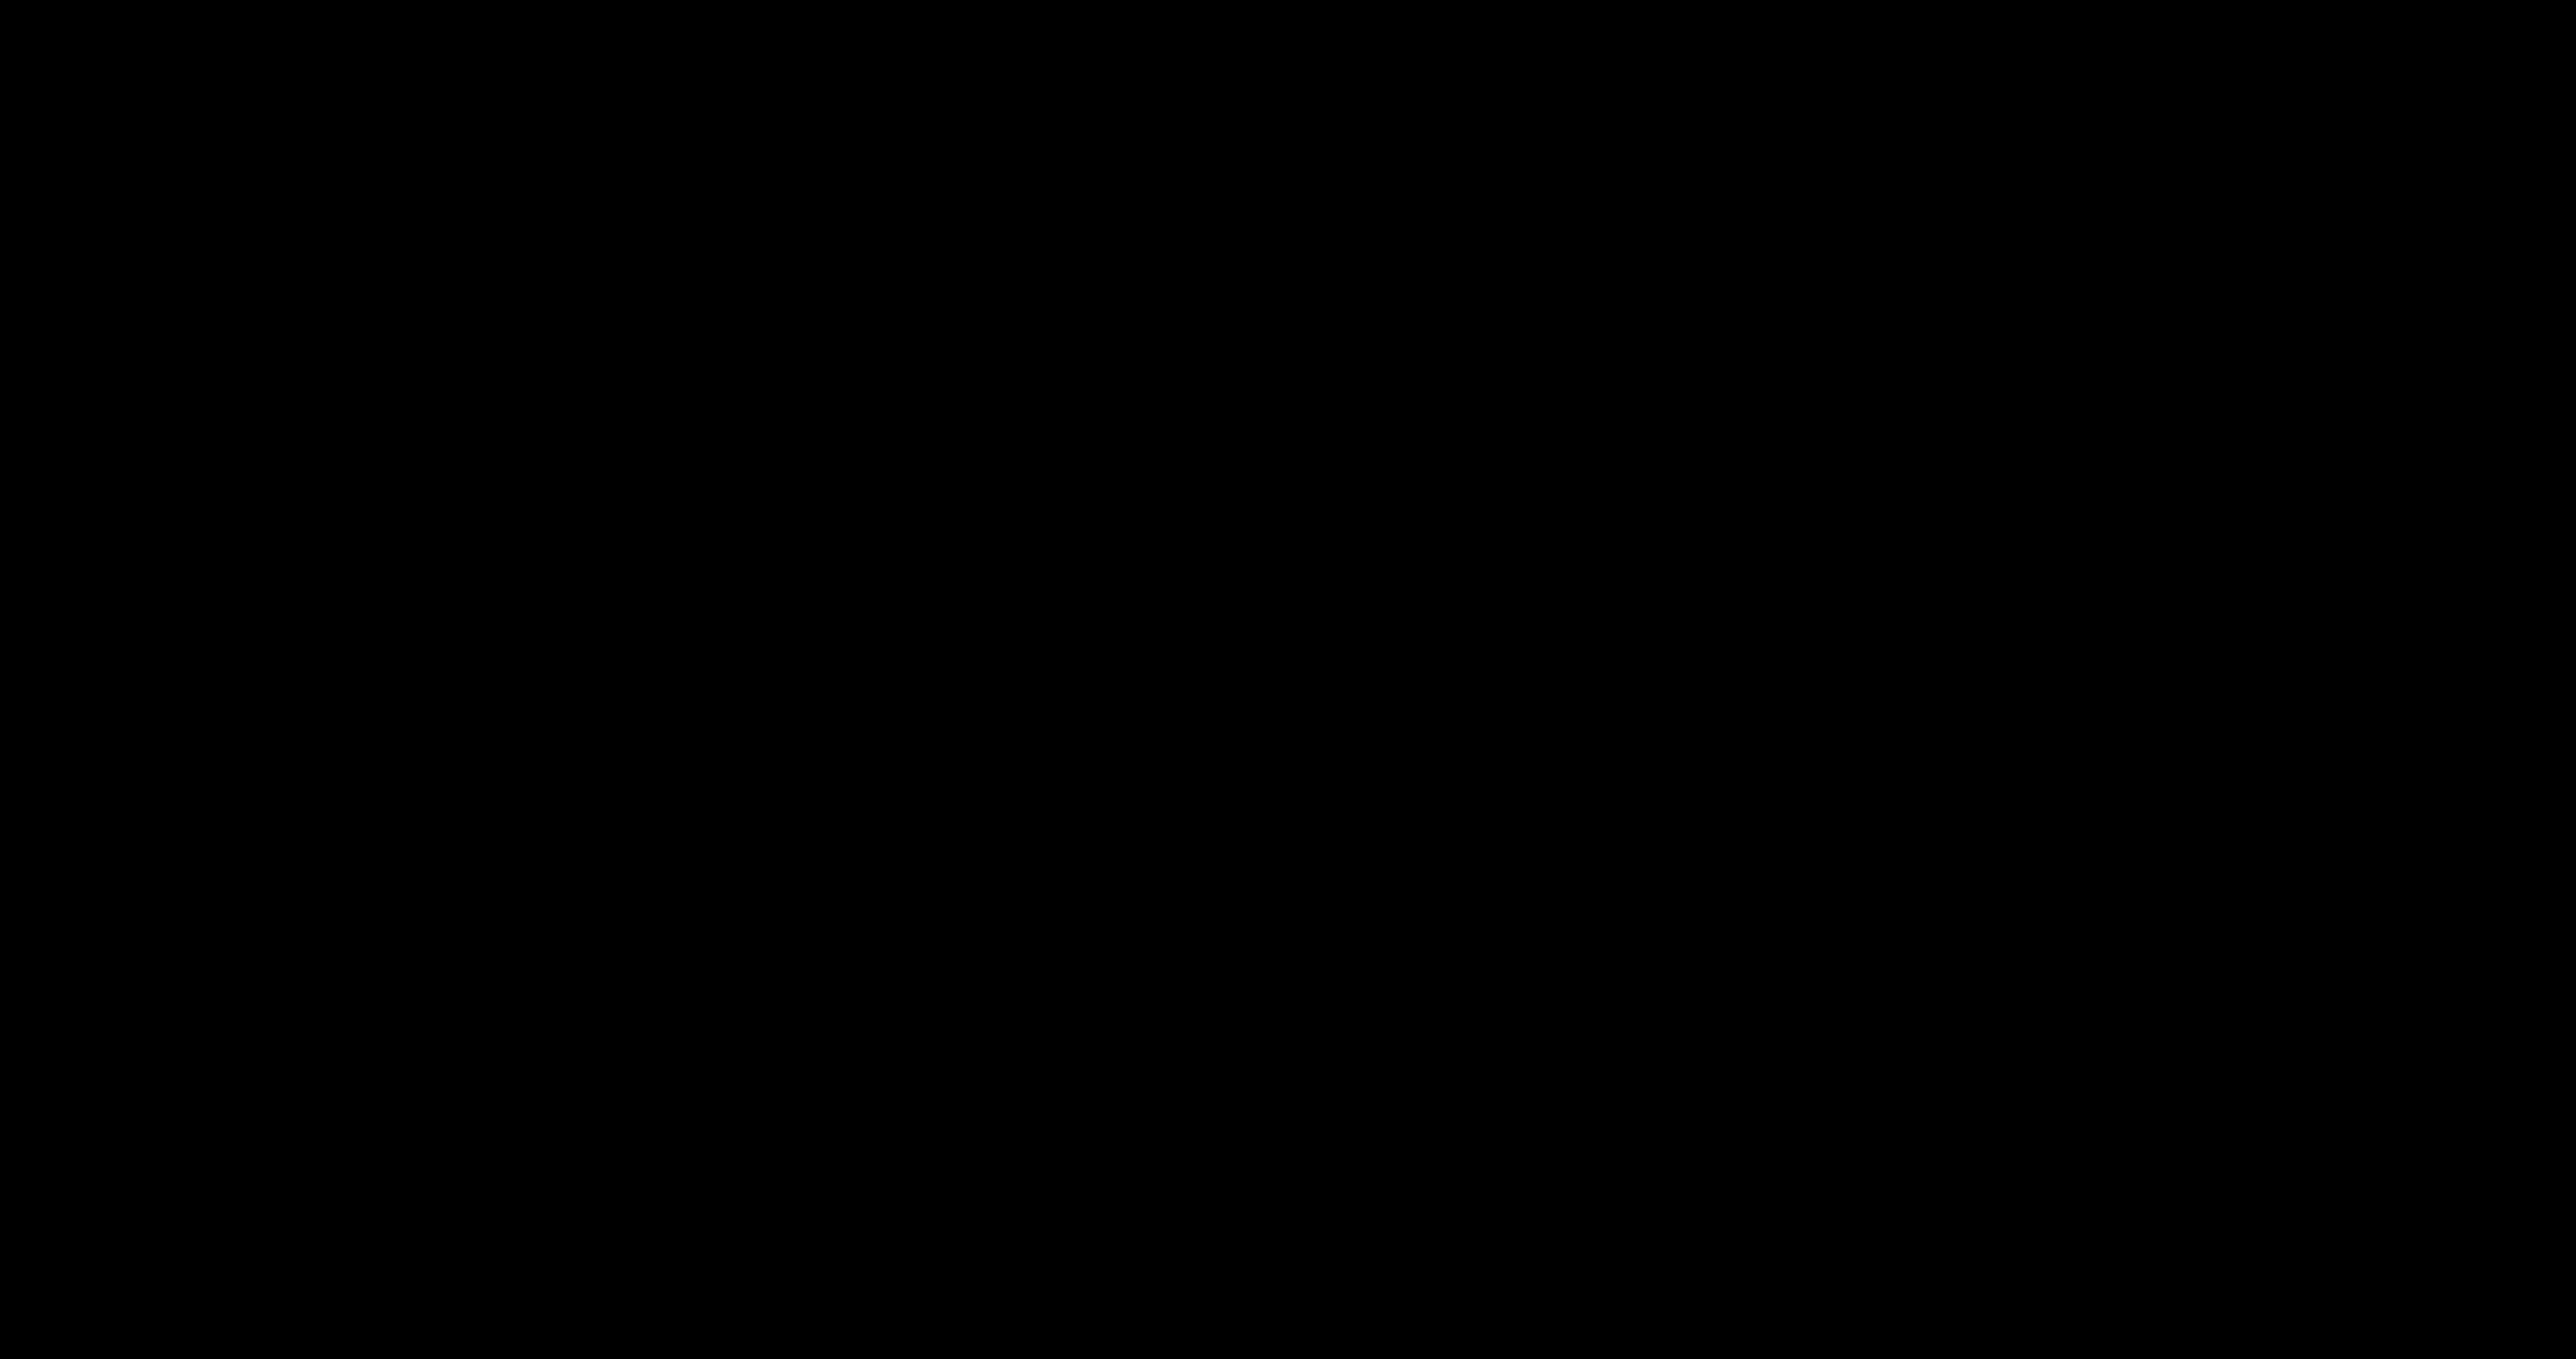

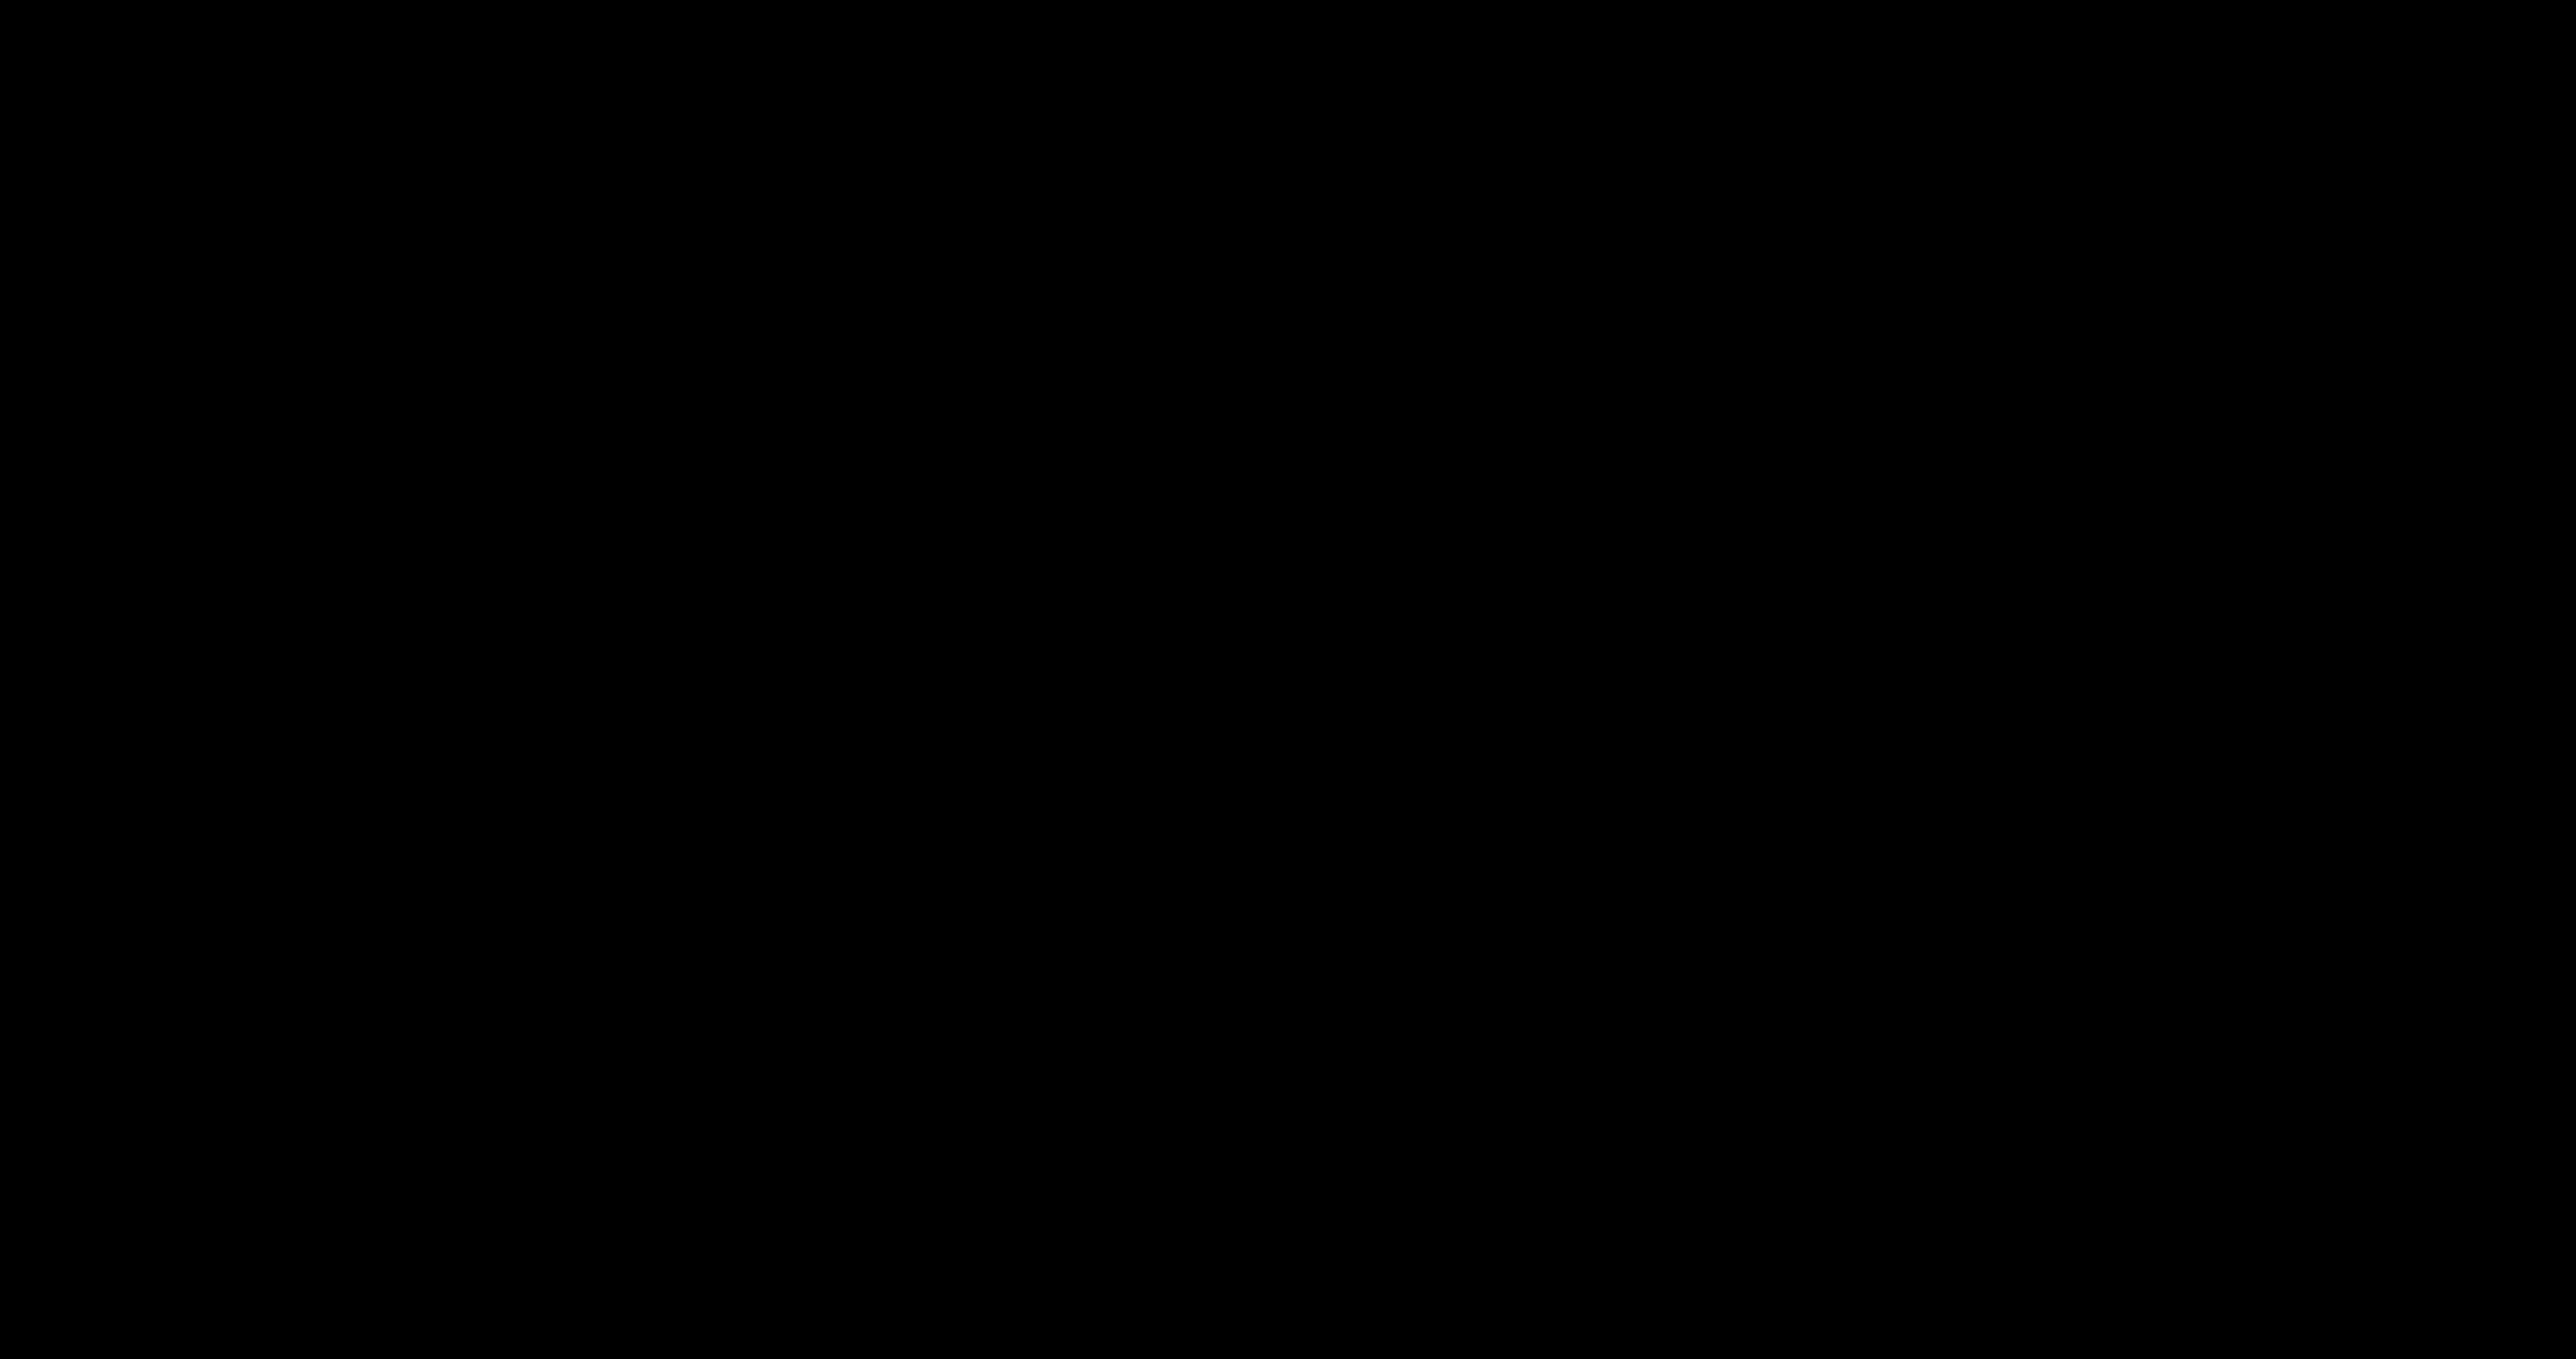

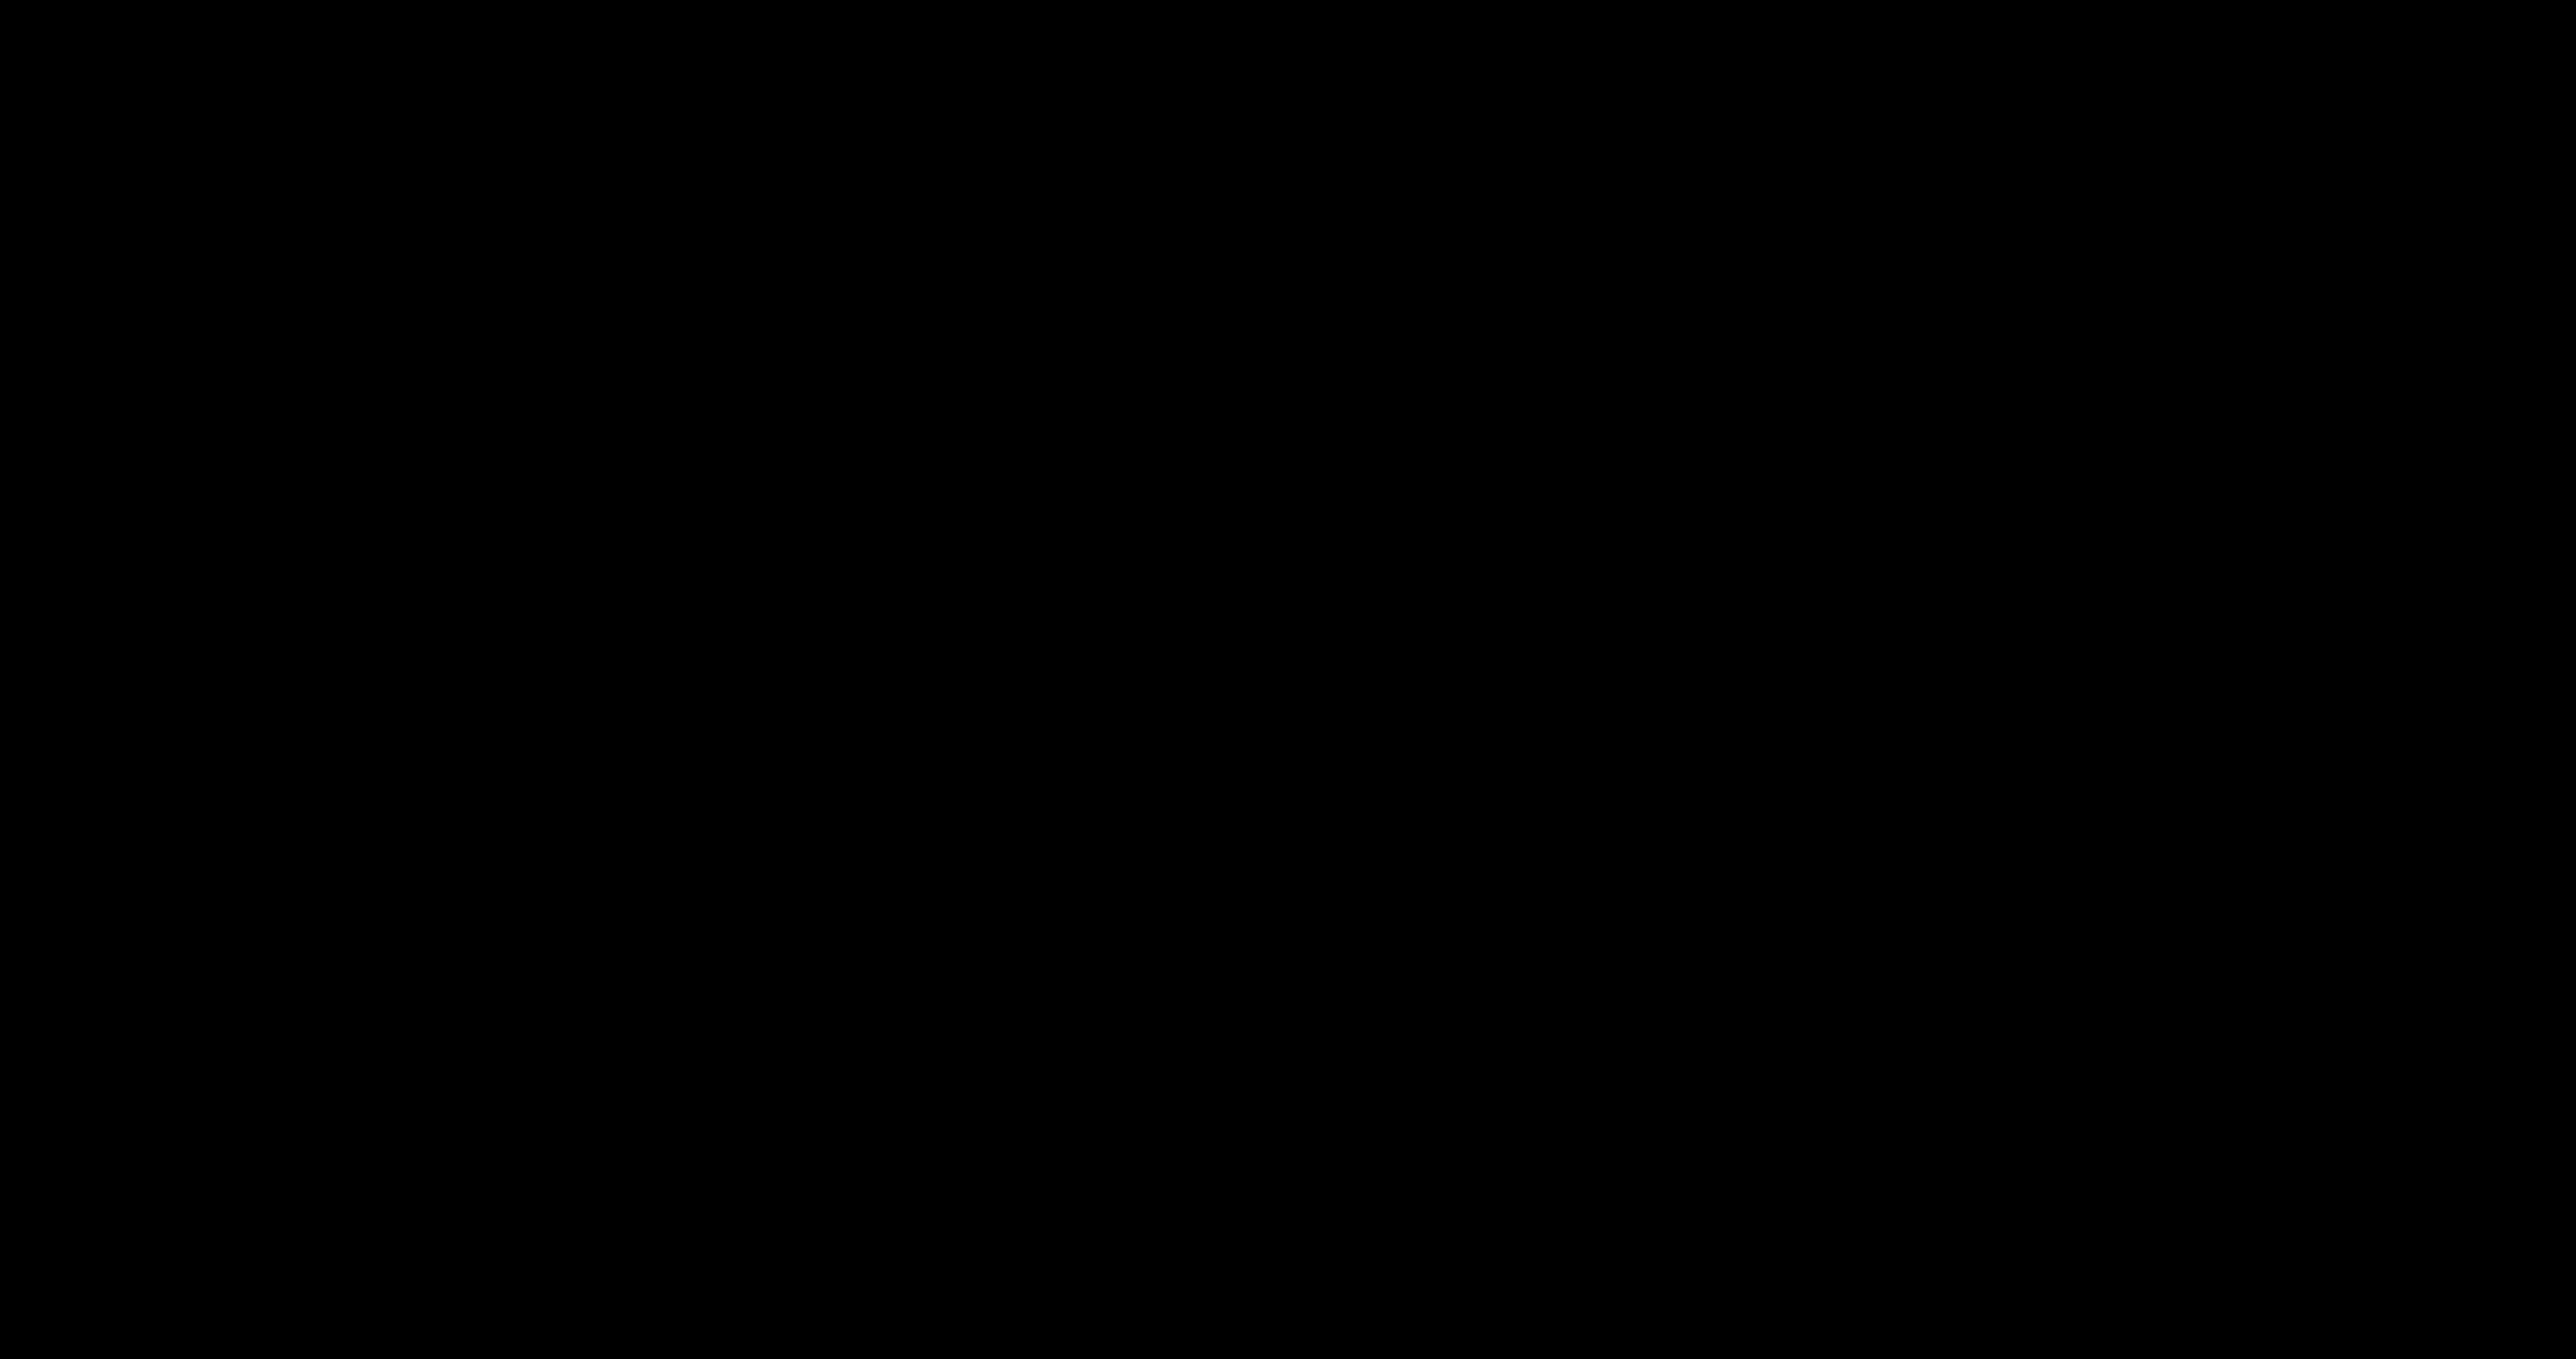

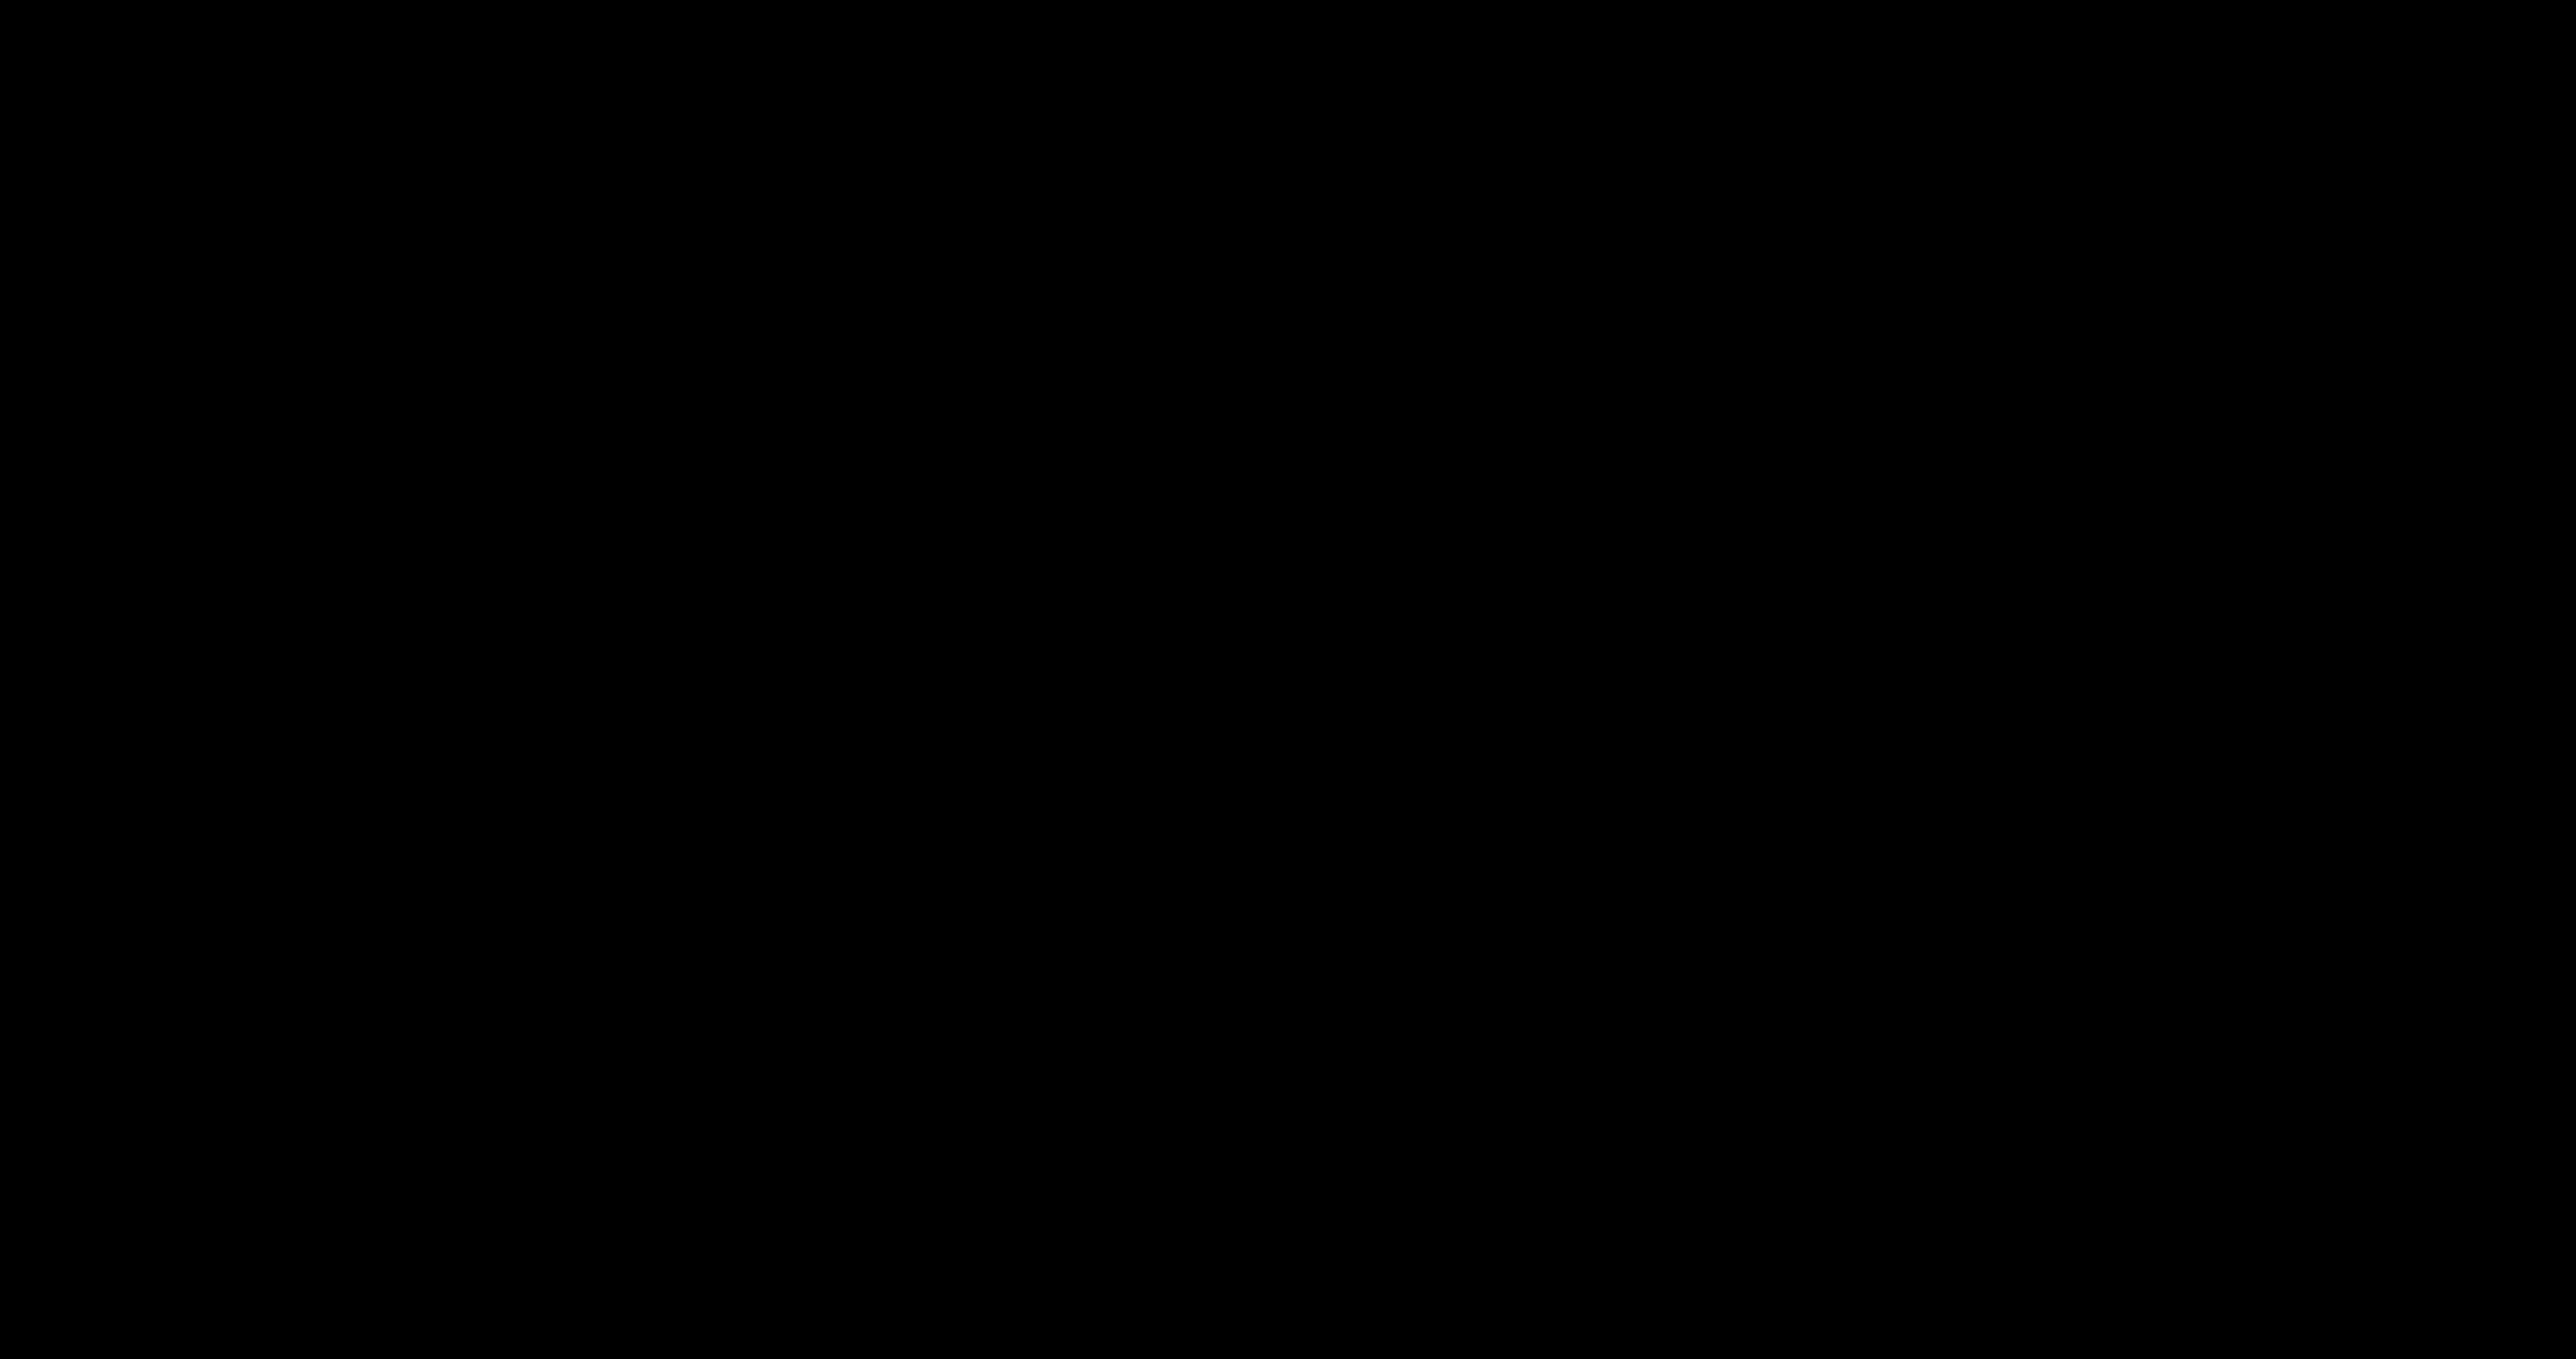

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install yt-dlp scenedetect ffmpeg-python --quiet

import os
import yt_dlp
import shutil
from google.colab import files
from scenedetect import detect, ContentDetector
import ffmpeg
from IPython.display import Image, display
from google.colab import files
uploaded = files.upload()

# 1. Ask for video link
video_url = input("🎬 Enter a video link (YouTube/Instagram/TikTok): ")

# 2. Download video as MP4
out_dir = "/content/videos"
os.makedirs(out_dir, exist_ok=True)

ydl_opts = {
    'format': 'bestvideo[ext=mp4]+bestaudio[ext=m4a]/mp4',
    'merge_output_format': 'mp4',
    'outtmpl': os.path.join(out_dir, 'video.%(ext)s'),
    'cookiefile': 'cookies.txt'   # 👈 this is required
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    info = ydl.extract_info(video_url, download=True)
    video_path = ydl.prepare_filename(info)

print(f"✅ Video downloaded at: {video_path}")

# 3. Scene detection
scene_list = detect(video_path, ContentDetector(threshold=12.0))
print(f"🔎 Detected {len(scene_list)} scenes.")

frames_dir = "/content/frames"
os.makedirs(frames_dir, exist_ok=True)
scene_frames = []

if len(scene_list) > 0:
    # Extract first frame of each scene using ffmpeg
    for i, scene in enumerate(scene_list):
        ts = scene[0].get_seconds()
        frame_path = os.path.join(frames_dir, f"scene_{i+1}.jpg")
        (
            ffmpeg
            .input(video_path, ss=ts)
            .output(frame_path, vframes=1)
            .run(capture_stdout=True, capture_stderr=True)
        )
        scene_frames.append(frame_path)
else:
    print("⚠️ No scenes found. Falling back to 1 frame per second with ffmpeg...")
    frame_pattern = os.path.join(frames_dir, "frame_%04d.jpg")
    (
        ffmpeg
        .input(video_path)
        .filter('fps', fps=24)  # 24 frame per second
        .output(frame_pattern)
        .run(capture_stdout=True, capture_stderr=True)
    )
    scene_frames = sorted([os.path.join(frames_dir, f) for f in os.listdir(frames_dir)])

print(f"✅ Extracted {len(scene_frames)} frames.")

# 4. Preview first few frames
for f in scene_frames[:5]:
    display(Image(filename=f))

# 5. Download as ZIP
if scene_frames:
    shutil.make_archive("/content/scene_frames", 'zip', frames_dir)
    files.download("/content/scene_frames.zip")
else:
    print("⚠️ Still no frames extracted - check video manually.")
